# Projet analyse de données  
### Jeu de données : football 
#### Groupe : Marc Berret, Damien Vallon, Yoann Vittoz

# I) Importation des librairies 

In [1]:
import sqlite3 as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# II)  Connection avec la base de données et création des dataframes 

In [2]:
con = sq.connect('database.sqlite')
data_player = pd.read_sql_query("SELECT * FROM Player",con)
data_country = pd.read_sql_query("SELECT * FROM country",con)
data_league = pd.read_sql_query("SELECT * FROM league",con)
data_match = pd.read_sql_query("SELECT * FROM match",con)
data_playerA = pd.read_sql_query("SELECT * FROM player_Attributes",con)
data_team = pd.read_sql_query("SELECT * FROM team",con)
data_teamA = pd.read_sql_query("SELECT * FROM Team_Attributes",con)

# III) Affichage des différentes tables

In [3]:
data_player.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [4]:
data_country.head(3)

,id,name
0,1,Belgium
1,1729,England
2,4769,France


In [5]:
data_league.head(3)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1


In [6]:
data_match.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [7]:
data_playerA.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [8]:
data_team.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [9]:
data_teamA.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


# IV) Ajouts de colonnes dans data_match vérifiant certaines conditions

In [10]:
conditionlist = [
    (data_match['home_team_goal'] > data_match['away_team_goal']) ,
    (data_match['home_team_goal'] <= data_match['away_team_goal'])]
choicelist = [1, 0]
data_match['win_home'] = np.select(conditionlist, choicelist, default='Not Specified')
#resultat donne 1 si vainqueur à domicile 0 si autre résultat

In [11]:
conditionlist = [
    (data_match['home_team_goal'] >= data_match['away_team_goal']) ,
    (data_match['home_team_goal'] < data_match['away_team_goal'])]
choicelist = [0, 1]
data_match['win_away'] = np.select(conditionlist, choicelist, default='Not Specified')
#resultat donne 1 si vainqueur à l'extérieur 0 si autre résultat

In [12]:
conditionlist = [
    (data_match['home_team_goal'] > data_match['away_team_goal']) ,
    (data_match['home_team_goal'] == data_match['away_team_goal']),
    (data_match['home_team_goal'] < data_match['away_team_goal'])]
choicelist = [data_match['home_team_api_id'],'nul', data_match['away_team_api_id']]
data_match['result'] = np.select(conditionlist, choicelist, default='Not Specified')
#resultat donne le team_api_id du vainqueur ou 'nul' si match nul

In [13]:
conditionlist = [data_match['home_team_goal'] == data_match['away_team_goal']]
choicelist = [data_match['home_team_api_id']]
choicelist2 = [data_match['away_team_api_id']]
data_match['draw_home'] = np.select(conditionlist, choicelist, default=0)
data_match['draw_away'] = np.select(conditionlist, choicelist2, default=0)
#resultat donne le team_api_id des équipe en cas de match nul

In [14]:
#merge pour avoir dans data_match le nom du pays de l'équipe
data_match = pd.merge(data_match,data_country,how="right",left_on="country_id",right_on="id")

In [15]:
#Renommage de la colonne name en country_name
data_match.rename(columns={'name': 'country_name'}, inplace=True)

In [16]:
data_match.head(5)

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,BSH,BSD,BSA,win_home,win_away,result,draw_home,draw_away,id_y,country_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.73,3.40,4.20,0,0,nul,9987,9993,1,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,1.91,3.25,3.60,0,0,nul,10000,9994,1,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.30,3.20,2.75,0,1,8635,0,0,1,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,1.44,3.75,6.50,1,0,9991,0,0,1,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,4.75,3.30,1.67,0,1,9985,0,0,1,Belgium


In [17]:
data_match.drop(["id_x","id_y","goal","shoton","shotoff","foulcommit","card","cross","corner","possession"],inplace=True,axis=1)
#suppression des colonnes inutiles

### Table data_match après modification

In [18]:
data_match.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,GBA,BSH,BSD,BSA,win_home,win_away,result,draw_home,draw_away,country_name
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,...,4.00,1.73,3.40,4.20,0,0,nul,9987,9993,Belgium
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,...,3.75,1.91,3.25,3.60,0,0,nul,10000,9994,Belgium
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,...,2.50,2.30,3.20,2.75,0,1,8635,0,0,Belgium
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,...,5.50,1.44,3.75,6.50,1,0,9991,0,0,Belgium
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,...,1.65,4.75,3.30,1.67,0,1,9985,0,0,Belgium


# V) Création de nouveaux dataframes

## 1. year_win : pour chaque année, pour chaque équipe, on a son nombre de victoires

In [19]:
year_win = data_match.groupby(["season","country_name","result"])["match_api_id"].count()
year_win=year_win.reset_index()
year_win.head(5)

,season,country_name,result,match_api_id
0,2008/2009,Belgium,10000,16
1,2008/2009,Belgium,10001,15
2,2008/2009,Belgium,4049,7
3,2008/2009,Belgium,7947,9
4,2008/2009,Belgium,8203,12


In [20]:
year_win.rename(columns={'result': 'team_api_id'}, inplace=True)
year_win.rename(columns={'match_api_id': 'nb_win'}, inplace=True)
ind=year_win[year_win['team_api_id']=='nul'].index
year_win.drop(ind,inplace=True)

In [21]:
#merge pour avoir dans year_win le nom de l'équipe
year_win["team_api_id"]=year_win["team_api_id"].astype(int)
year_win = pd.merge(year_win,data_team, how='left',left_on="team_api_id",right_on="team_api_id")

In [22]:
year_win.drop(["id","team_fifa_api_id","team_short_name"],inplace=True, axis=1)

year_win.head()

,season,country_name,team_api_id,nb_win,team_long_name
0,2008/2009,Belgium,10000,16,SV Zulte-Waregem
1,2008/2009,Belgium,10001,15,KVC Westerlo
2,2008/2009,Belgium,4049,7,Tubize
3,2008/2009,Belgium,7947,9,FCV Dender EH
4,2008/2009,Belgium,8203,12,KV Mechelen


## 1.1. Un exemple d'utilisation

### Régularité de  Manchester United, City et Arsenal en termes de victoires 

<ipython-input-23-983e5b5555e8>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.xaxis.set_ticklabels(['08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15','15/16'])


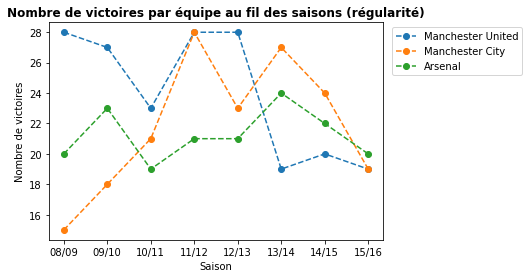

In [23]:
barca=year_win[year_win["team_long_name"]=='FC Barcelona'][["season","nb_win"]]

city=year_win[year_win["team_long_name"]=='Manchester City'][["season","nb_win"]]

united=year_win[year_win["team_long_name"]=='Manchester United'][["season","nb_win"]]

arsenal=year_win[year_win["team_long_name"]=='Arsenal'][["season","nb_win"]]

x=united["season"]
y1=united["nb_win"]
y2=city["nb_win"]
y3=arsenal["nb_win"]
plt.plot(x,y1,"o--",label='Manchester United')
plt.plot(x,y2,"o--",label='Manchester City')
plt.plot(x,y3,"o--",label='Arsenal')
axes = plt.gca()
axes.xaxis.set_ticklabels(['08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15','15/16'])
plt.xlabel ('Saison')
plt.ylabel("Nombre de victoires")
plt.legend(bbox_to_anchor=(1.43, 1))
plt.title('Nombre de victoires par équipe au fil des saisons (régularité)',fontweight='bold');
plt.show()

#on voit que Man united au début gagne plus mais au final est la moins bonne des 3 équipes, 
#city commence bien en dessous mais monte petit a petit et arsenal est régulière entre 19 et 24 victoires par an

## 2. year_draw : pour chaque année, pour chaque équipe, on a le nombre de matchs nuls

In [24]:
temp3 = data_match.groupby(["season","country_name","draw_home"])["match_api_id"].count()
temp4 = data_match.groupby(["season","country_name","draw_away"])["match_api_id"].count()
temp3=temp3.reset_index()
temp4=temp4.reset_index()
year_draw = pd.merge(temp3,temp4,how="left",left_on=["season","country_name","draw_home"],right_on=["season","country_name","draw_away"])
year_draw["nb_draw"]=year_draw["match_api_id_x"]+year_draw["match_api_id_y"]
year_draw = pd.merge(year_draw,data_team,how="left",left_on=["draw_home"],right_on=["team_api_id"])
year_draw.head()

,season,country_name,draw_home,match_api_id_x,draw_away,match_api_id_y,nb_draw,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,2008/2009,Belgium,0,239,0.0,239.0,478.0,NaN,NaN,NaN,NaN,NaN
1,2008/2009,Belgium,4049,2,4049.0,4.0,6.0,15.0,4049.0,NaN,Tubize,TUB
2,2008/2009,Belgium,7947,4,7947.0,4.0,8.0,9.0,7947.0,NaN,FCV Dender EH,DEN
3,2008/2009,Belgium,8203,7,8203.0,3.0,10.0,11.0,8203.0,110724.0,KV Mechelen,MEC
4,2008/2009,Belgium,8342,2,8342.0,3.0,5.0,12.0,8342.0,231.0,Club Brugge KV,CLB


In [25]:
year_draw.drop(["draw_home","match_api_id_x","match_api_id_y","id","team_api_id","team_fifa_api_id","team_short_name"],inplace=True, axis=1)
year_draw.rename(columns={'draw_away': 'team_api_id'}, inplace=True)
year_draw.drop(year_draw[ year_draw['team_api_id'] == 0 ].index , inplace=True)
year_draw.head()

,season,country_name,team_api_id,nb_draw,team_long_name
1,2008/2009,Belgium,4049.0,6.0,Tubize
2,2008/2009,Belgium,7947.0,8.0,FCV Dender EH
3,2008/2009,Belgium,8203.0,10.0,KV Mechelen
4,2008/2009,Belgium,8342.0,5.0,Club Brugge KV
5,2008/2009,Belgium,8571.0,11.0,KV Kortrijk


In [26]:
year_win2 = year_win.sort_values(by=["season","team_api_id"], ascending=True)
year_draw2 = year_draw.sort_values(by=["season","team_api_id"], ascending=True)
year_draw2.head()

,season,country_name,team_api_id,nb_draw,team_long_name
118,2008/2009,Poland,1601.0,7.0,Ruch Chorzów
119,2008/2009,Poland,1957.0,7.0,Jagiellonia Białystok
120,2008/2009,Poland,2182.0,11.0,Lech Poznań
121,2008/2009,Poland,2183.0,9.0,P. Warszawa
122,2008/2009,Poland,2186.0,9.0,Cracovia


## 3. year_general : table qui réunit les 2 tables précédentes

In [27]:
year_general = pd.merge(year_draw2,year_win2,how="left",left_on=["season","country_name","team_api_id","team_long_name"],right_on=["season","country_name","team_api_id","team_long_name"])
year_general = year_general.assign(year_point = year_general["nb_draw"]+3*year_general["nb_win"])
year_general.head()

,season,country_name,team_api_id,nb_draw,team_long_name,nb_win,year_point
0,2008/2009,Poland,1601.0,7.0,Ruch Chorzów,9.0,34.0
1,2008/2009,Poland,1957.0,7.0,Jagiellonia Białystok,9.0,34.0
2,2008/2009,Poland,2182.0,11.0,Lech Poznań,16.0,59.0
3,2008/2009,Poland,2183.0,9.0,P. Warszawa,15.0,54.0
4,2008/2009,Poland,2186.0,9.0,Cracovia,7.0,30.0


In [28]:
index_nan = year_general.index[year_general.isnull().any(axis=1)]
year_general.drop(index_nan , inplace=True)
year_general.head()

,season,country_name,team_api_id,nb_draw,team_long_name,nb_win,year_point
0,2008/2009,Poland,1601.0,7.0,Ruch Chorzów,9.0,34.0
1,2008/2009,Poland,1957.0,7.0,Jagiellonia Białystok,9.0,34.0
2,2008/2009,Poland,2182.0,11.0,Lech Poznań,16.0,59.0
3,2008/2009,Poland,2183.0,9.0,P. Warszawa,15.0,54.0
4,2008/2009,Poland,2186.0,9.0,Cracovia,7.0,30.0


## 4. total_goal_year : pour chaque année, pour chaque équipe, on a le nombre de buts marqués

In [29]:
#pour home
total_home = data_match.groupby(["season","home_team_api_id"])["home_team_goal"].sum()
total_home=total_home.reset_index()
total_home.rename(columns={'home_team_api_id':'team_api_id'},inplace=True)

# pour away 
total_away = data_match.groupby(["season","away_team_api_id"])["away_team_goal"].sum()
total_away=total_away.reset_index()
total_away.rename(columns={'away_team_api_id':'team_api_id'},inplace=True)
total_away.head()

,season,team_api_id,away_team_goal
0,2008/2009,1601,9
1,2008/2009,1957,4
2,2008/2009,2182,29
3,2008/2009,2183,21
4,2008/2009,2186,12


In [30]:
total_goal_year = pd.merge(total_home,total_away,how="left",left_on=["season","team_api_id"],right_on=["season","team_api_id"])
total_goal_year["team_goal"]=total_goal_year["home_team_goal"]+total_goal_year["away_team_goal"]
total_goal_year.head()

,season,team_api_id,home_team_goal,away_team_goal,team_goal
0,2008/2009,1601,13,9,22
1,2008/2009,1957,24,4,28
2,2008/2009,2182,22,29,51
3,2008/2009,2183,19,21,40
4,2008/2009,2186,12,12,24


In [31]:
#on rajoute le nom de l'équipe à total_goal_year

total_goal_year = pd.merge(total_goal_year,data_team, how='left',left_on="team_api_id",right_on="team_api_id")
total_goal_year.drop(["id","team_short_name","team_fifa_api_id"],inplace=True,axis=1)
total_goal_year.head()

,season,team_api_id,home_team_goal,away_team_goal,team_goal,team_long_name
0,2008/2009,1601,13,9,22,Ruch Chorzów
1,2008/2009,1957,24,4,28,Jagiellonia Białystok
2,2008/2009,2182,22,29,51,Lech Poznań
3,2008/2009,2183,19,21,40,P. Warszawa
4,2008/2009,2186,12,12,24,Cracovia


## 4.1. Un exemple d'utilisation

### 1. Top 10 des équipes qui marquent le plus à domicile

In [32]:
home_team_goal_max = total_goal_year.sort_values(by=["season","home_team_goal"],ascending=False)
home_team_goal_max = home_team_goal_max.head(10)

home_team_goal_max
#home_team_goal_max prend les 10 meilleures équipes en terme de buts marqués à domicile 

,season,team_api_id,home_team_goal,away_team_goal,team_goal,team_long_name
1372,2015/2016,8633,70,40,110,Real Madrid CF
1373,2015/2016,8634,67,45,112,FC Barcelona
1415,2015/2016,9847,59,43,102,Paris Saint-Germain
1433,2015/2016,9925,55,38,93,Celtic
1394,2015/2016,9772,52,36,88,SL Benfica
1406,2015/2016,9823,51,29,80,FC Bayern Munich
1452,2015/2016,10192,50,28,78,BSC Young Boys
1366,2015/2016,8593,49,32,81,Ajax
1398,2015/2016,9789,49,33,82,Borussia Dortmund
1423,2015/2016,9875,49,31,80,Napoli


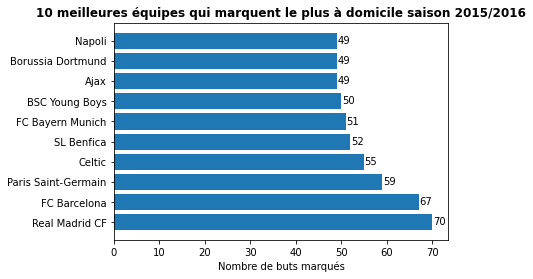

In [33]:
classe=plt.barh(home_team_goal_max["team_long_name"],home_team_goal_max["home_team_goal"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
plt.xlabel("Nombre de buts marqués")
plt.title("10 meilleures équipes qui marquent le plus à domicile saison 2015/2016",fontweight='bold')
plt.show()

Les 3 meilleures sont le Real, Barcelone et le PSG : elles marquent le plus de buts à domicile. Regardons qui marque le plus de buts à l'extérieur

### 2. Top 10 des équipes qui marquent le plus à l'extérieur

In [34]:
away_team_goal_max = total_goal_year.sort_values(by=["season","away_team_goal"],ascending=False)
away_team_goal_max = away_team_goal_max.head(10)
away_team_goal_max

,season,team_api_id,home_team_goal,away_team_goal,team_goal,team_long_name
1377,2015/2016,8640,41,47,88,PSV
1373,2015/2016,8634,67,45,112,FC Barcelona
1435,2015/2016,9931,44,44,88,FC Basel
1415,2015/2016,9847,59,43,102,Paris Saint-Germain
1372,2015/2016,8633,70,40,110,Real Madrid CF
1393,2015/2016,9768,39,40,79,Sporting CP
1386,2015/2016,8686,44,39,83,Roma
1426,2015/2016,9885,37,38,75,Juventus
1433,2015/2016,9925,55,38,93,Celtic
1394,2015/2016,9772,52,36,88,SL Benfica


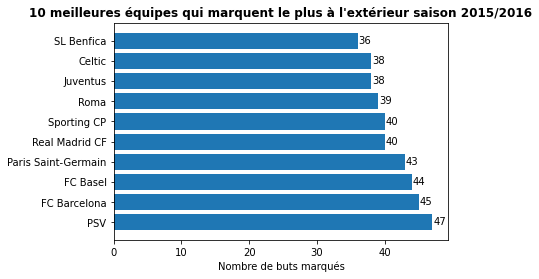

In [35]:
classe=plt.barh(away_team_goal_max["team_long_name"],away_team_goal_max["away_team_goal"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
plt.xlabel("Nombre de buts marqués")
plt.title("10 meilleures équipes qui marquent le plus à l'extérieur saison 2015/2016",fontweight='bold')
plt.show()

Les 3 meilleurs sont le PSV, Barcelone et Bale : elles marquent le plus de buts à l'extérieur.

## 5. total_goal_year2 : pour chaque année, pour chaque équipe, on a le nombre de buts encaissés

In [36]:
#encaissés à domicile
bc_dom = data_match.groupby(["season","home_team_api_id"])["away_team_goal"].sum()
bc_dom=bc_dom.reset_index()
bc_dom.rename(columns={'home_team_api_id':'team_api_id'},inplace=True)
bc_dom.rename(columns={'away_team_goal':'home_against_goal'},inplace=True)

# encaissés à l'extérieur 
bc_ext = data_match.groupby(["season","away_team_api_id"])["home_team_goal"].sum()
bc_ext=bc_ext.reset_index()
bc_ext.rename(columns={'away_team_api_id':'team_api_id'},inplace=True)
bc_ext.rename(columns={'home_team_goal':'away_against_goal'},inplace=True)
bc_ext.head()

,season,team_api_id,away_against_goal
0,2008/2009,1601,21
1,2008/2009,1957,19
2,2008/2009,2182,14
3,2008/2009,2183,13
4,2008/2009,2186,32


In [37]:
total_goal_year2 = pd.merge(bc_dom,bc_ext,how="left",left_on=["season","team_api_id"],right_on=["season","team_api_id"])
total_goal_year2["goal_against"]=total_goal_year2["home_against_goal"]+total_goal_year2["away_against_goal"]
total_goal_year2.head()

,season,team_api_id,home_against_goal,away_against_goal,goal_against
0,2008/2009,1601,11,21,32
1,2008/2009,1957,15,19,34
2,2008/2009,2182,10,14,24
3,2008/2009,2183,10,13,23
4,2008/2009,2186,8,32,40


In [38]:
total_goal = pd.merge(total_goal_year,total_goal_year2,how='left',left_on=["season","team_api_id"],right_on=["season","team_api_id"])

## VI) year_summary : table qui pour chaque année, pour chaque équipe résume tout

In [39]:
year_summary = pd.merge(year_general,total_goal,how="left",left_on=["season","team_api_id"],right_on=["season","team_api_id"])

In [40]:
year_summary.head(5)

,season,country_name,team_api_id,nb_draw,team_long_name_x,nb_win,year_point,home_team_goal,away_team_goal,team_goal,team_long_name_y,home_against_goal,away_against_goal,goal_against
0,2008/2009,Poland,1601.0,7.0,Ruch Chorzów,9.0,34.0,13,9,22,Ruch Chorzów,11,21,32
1,2008/2009,Poland,1957.0,7.0,Jagiellonia Białystok,9.0,34.0,24,4,28,Jagiellonia Białystok,15,19,34
2,2008/2009,Poland,2182.0,11.0,Lech Poznań,16.0,59.0,22,29,51,Lech Poznań,10,14,24
3,2008/2009,Poland,2183.0,9.0,P. Warszawa,15.0,54.0,19,21,40,P. Warszawa,10,13,23
4,2008/2009,Poland,2186.0,9.0,Cracovia,7.0,30.0,12,12,24,Cracovia,8,32,40


In [41]:
year_summary = year_summary.reindex(columns=['season','country_name','team_long_name_x','nb_win','nb_draw','year_point','team_goal','home_team_goal','away_team_goal','goal_against','home_against_goal','away_against_goal','team_api_id'])
year_summary.rename(columns={'country_name':'country','team_long_name_x':'team_long_name'},inplace=True)

year_summary["nb_win"]=year_summary["nb_win"].astype(int)
year_summary["nb_draw"]=year_summary["nb_draw"].astype(int)
year_summary["year_point"]=year_summary["year_point"].astype(int)
year_summary.insert(6, "goal_difference", year_summary["team_goal"]-year_summary["goal_against"], allow_duplicates=False)
year_summary.head()

#on a le tableau pour trier les équipe par nb de buts, victoires, points...
#on se sert de ce tableau pour faire classemnt général avec groupby sur les équipes
#on s'en sert aussi pour les classement par années et par pays

,season,country,team_long_name,nb_win,nb_draw,year_point,goal_difference,team_goal,home_team_goal,away_team_goal,goal_against,home_against_goal,away_against_goal,team_api_id
0,2008/2009,Poland,Ruch Chorzów,9,7,34,-10,22,13,9,32,11,21,1601.0
1,2008/2009,Poland,Jagiellonia Białystok,9,7,34,-6,28,24,4,34,15,19,1957.0
2,2008/2009,Poland,Lech Poznań,16,11,59,27,51,22,29,24,10,14,2182.0
3,2008/2009,Poland,P. Warszawa,15,9,54,17,40,19,21,23,10,13,2183.0
4,2008/2009,Poland,Cracovia,7,9,30,-16,24,12,12,40,8,32,2186.0


# VII) Les différents classements de performances

### 1. Nombre de victoires

In [42]:
win = year_summary.groupby(["country","team_long_name"])["nb_win"].sum()
win.reset_index()
win = win.sort_values(ascending=False)
win = win.reset_index()
win.head()

,country,team_long_name,nb_win
0,Spain,FC Barcelona,234
1,Scotland,Celtic,218
2,Germany,FC Bayern Munich,193
3,Portugal,FC Porto,183
4,Netherlands,Ajax,181


### top_win : table qui montre le top 10 des équipes ayant gagné le plus de victoires

In [43]:
top_win = win.copy()
top_win=top_win.head(10)
top_win

,country,team_long_name,nb_win
0,Spain,FC Barcelona,234
1,Scotland,Celtic,218
2,Germany,FC Bayern Munich,193
3,Portugal,FC Porto,183
4,Netherlands,Ajax,181
5,Switzerland,FC Basel,180
6,England,Chelsea,176
7,France,Paris Saint-Germain,175
8,England,Arsenal,170
9,Spain,Real Madrid CF,167


### Diagramme en baton représentant top_win

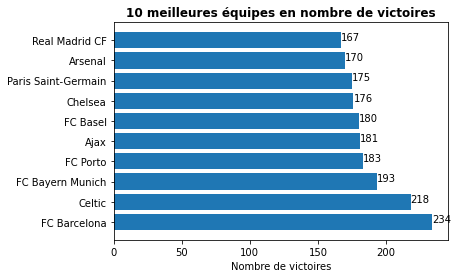

In [44]:
#top 10 des équipes qui gagnent le plus sur les années étudiées : 
classe=plt.barh(top_win["team_long_name"],top_win["nb_win"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires")
plt.title("10 meilleures équipes en nombre de victoires",fontweight='bold')
plt.show()

Ce graphique nous donne les 10 meilleures équipes en nombre de victoire, FC Barcelona et Celtic sont les deux équipes qui ont le plus de victoires (supérieures à 200)

### bad_win : table qui montre le top 10 des équipes ayant le moins gagné en terme de victoires

In [45]:
bad_win = win.copy()
bad_win=bad_win.tail(10)
bad_win=bad_win.reset_index()
bad_win

,index,country,team_long_name,nb_win
0,285,Scotland,Dunfermline Athletic,5
1,286,Portugal,FC Penafiel,5
2,287,Belgium,KAS Eupen,5
3,288,Portugal,Trofense,5
4,289,Portugal,Feirense,5
5,290,Germany,DSC Arminia Bielefeld,4
6,291,Germany,SpVgg Greuther Fürth,4
7,292,Netherlands,FC Dordrecht,4
8,293,France,AC Arles-Avignon,3
9,294,Spain,Córdoba CF,3


### Diagramme en baton représentant bad_win

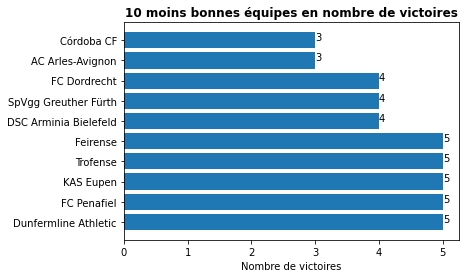

In [46]:
#10 équipes qui gagnent le moins sur les années étudiées : 
classe=plt.barh(bad_win["team_long_name"],width=bad_win["nb_win"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires")
plt.title("10 moins bonnes équipes en nombre de victoires",fontweight='bold')
plt.show()

Ce graphique nous donne les 10 équipes ayant les plus petits nombre de victoires, les deux dernières du classement sont AC Arles-Avignon et Cordoba CF.

### ytop_win : 10 meilleures équipes en nombre de victoires sur une seule saison

In [47]:
y_win=year_summary.sort_values(by="nb_win",ascending=False)
y_win = y_win[["country","season","team_long_name","nb_win"]]
ytop_win = y_win.head(10)
ytop_win.index=[1,2,3,4,5,6,7,8,9,10]
ytop_win
# on obtient le top 10 en nombre de victoires sur une année

,country,season,team_long_name,nb_win
1,Spain,2011/2012,Real Madrid CF,32
2,Spain,2012/2013,FC Barcelona,32
3,Scotland,2013/2014,Celtic,31
4,Spain,2009/2010,FC Barcelona,31
5,Scotland,2011/2012,Celtic,30
6,Spain,2010/2011,FC Barcelona,30
7,Scotland,2010/2011,Rangers,30
8,Spain,2014/2015,FC Barcelona,30
9,France,2015/2016,Paris Saint-Germain,30
10,Scotland,2014/2015,Celtic,29


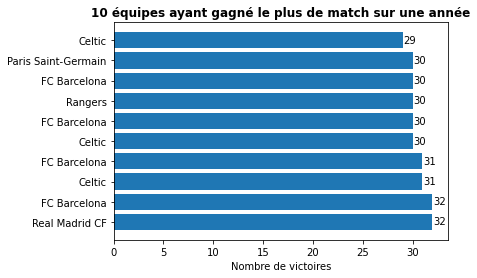

In [48]:
#top 10 des équipes qui gagnent le plus sur une année : 
classe=plt.barh(ytop_win.index,ytop_win["nb_win"],tick_label=ytop_win["team_long_name"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires")
plt.title("10 équipes ayant gagné le plus de match sur une année",fontweight='bold')
plt.show()

Lors de sa meilleure année, Real Madrid FC a cumulé 32 victoires 

### ytop_win_fr : meilleure équipe en nombre de victoires par saison en France

In [49]:
temp1 = year_summary[year_summary["country"]=='France'][["season","team_long_name","nb_win"]]
temp1 = temp1.groupby(["season","team_long_name"])["nb_win"].max()
temp1 = temp1.reset_index()
temp2 = temp1.groupby(by=["season"])["nb_win"].max()
temp2 = temp2.reset_index()
ytop_win_fr = pd.merge(temp1,temp2,how='right',left_on=["season","nb_win"],right_on=["season","nb_win"])
ytop_win_fr

,season,team_long_name,nb_win
0,2008/2009,Girondins de Bordeaux,24
1,2009/2010,Olympique de Marseille,23
2,2010/2011,LOSC Lille,21
3,2011/2012,Montpellier Hérault SC,25
4,2012/2013,Paris Saint-Germain,25
5,2013/2014,Paris Saint-Germain,27
6,2014/2015,Paris Saint-Germain,24
7,2015/2016,Paris Saint-Germain,30


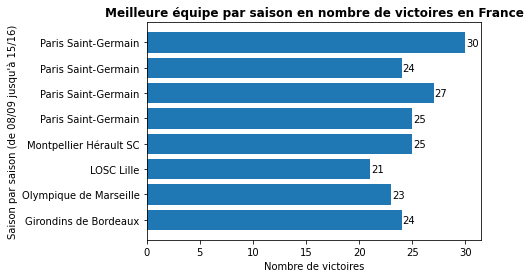

In [50]:
#meilleure équipe par année en nombre de victoire en France : 
classe=plt.barh(ytop_win_fr.index,ytop_win_fr["nb_win"],tick_label=ytop_win_fr["team_long_name"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires")
plt.ylabel("Saison par saison (de 08/09 jusqu'à 15/16)")
plt.title("Meilleure équipe par saison en nombre de victoires en France",fontweight='bold')
plt.show()

### Régularité de Paris, Lyon et Marseille en termes de victoires

<ipython-input-51-dbf1655660e2>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.xaxis.set_ticklabels(['08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15','15/16'])


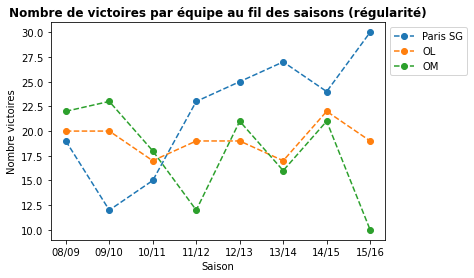

In [51]:
psg=year_summary[year_summary["team_long_name"]=='Paris Saint-Germain'][["season","nb_win"]]

ol=year_summary[year_summary["team_long_name"]=='Olympique Lyonnais'][["season","nb_win"]]

om=year_summary[year_summary["team_long_name"]=='Olympique de Marseille'][["season","nb_win"]]

arsenal=year_summary[year_summary["team_long_name"]=='Arsenal'][["season","nb_win"]]

#import seaborn as sb
#sb.set()

x=psg["season"]
y1=psg["nb_win"]
y2=ol["nb_win"]
y3=om["nb_win"]
plt.plot(x,y1,"o--",label='Paris SG')
plt.plot(x,y2,"o--",label='OL')
plt.plot(x,y3,"o--",label='OM')
axes = plt.gca()
axes.xaxis.set_ticklabels(['08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15','15/16'])
plt.xlabel ('Saison')
plt.ylabel("Nombre victoires")
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Nombre de victoires par équipe au fil des saisons (régularité)',fontweight='bold');
plt.show()

#on voit que Paris commence avec un plus faible nbre de victoire mais lors du rachat le nombre de victoire explose et finit par doubler
#l'OL est plutot régulier mais jamais premier et l'OM assez irrégulier mais finit devant lors de 3 saisons

### 2. Nombre de points

In [52]:
point = year_summary.groupby(["country","team_long_name"])["year_point"].sum()
point.reset_index()
point = point.sort_values(ascending=False)
point = point.reset_index()
point.head()

,country,team_long_name,year_point
0,Spain,FC Barcelona,745
1,Scotland,Celtic,704
2,Germany,FC Bayern Munich,623
3,Switzerland,FC Basel,604
4,Netherlands,Ajax,602


### top_point : table qui montre le top 10 des équipes ayant le plus de points

In [53]:
top_point = point.copy()
top_point=top_point.head(10)
top_point

,country,team_long_name,year_point
0,Spain,FC Barcelona,745
1,Scotland,Celtic,704
2,Germany,FC Bayern Munich,623
3,Switzerland,FC Basel,604
4,Netherlands,Ajax,602
5,France,Paris Saint-Germain,601
6,England,Chelsea,598
7,Portugal,FC Porto,591
8,England,Arsenal,583
9,Spain,Atlético Madrid,560


### Diagramme en baton représentant top_point

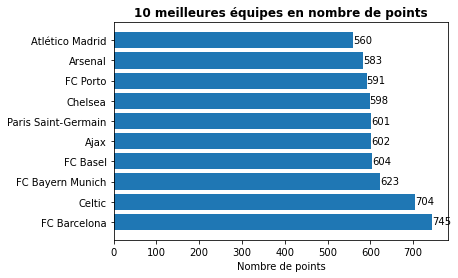

In [54]:
#top 10 des équipes qui marquent le plus de points sur les années étudiées : 
classe=plt.barh(top_point["team_long_name"],top_point["year_point"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de points")
plt.title("10 meilleures équipes en nombre de points",fontweight='bold')
plt.show()

### bad_point : table qui montre le top 10 des équipes ayant le moins de points

In [55]:
bad_point = point.copy()
bad_point=bad_point.tail(10)
bad_point=bad_point.reset_index()
bad_point.head()

,index,country,team_long_name,year_point
0,285,Portugal,Portimonense,25
1,286,Portugal,Feirense,24
2,287,Portugal,Trofense,23
3,288,Belgium,KAS Eupen,23
4,289,Portugal,FC Penafiel,22


### Diagramme en baton représentant bad_point

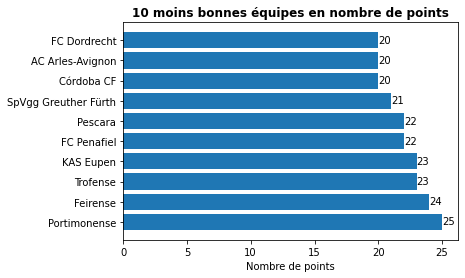

In [56]:
#10 équipes qui marquent le moins de points sur les années étudiées : 
classe=plt.barh(bad_point["team_long_name"],width=bad_point["year_point"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de points")
plt.title("10 moins bonnes équipes en nombre de points",fontweight='bold')
plt.show()

### ytop_point : 10 meilleures équipes en nombre de points sur une seule saison

In [57]:
y_point=year_summary.sort_values(by="year_point",ascending=False)
y_point = y_point[["country","season","team_long_name","year_point"]]
ytop_point = y_point.head(10)
ytop_point.index=[1,1,3,3,5,5,7,8,8,10]
ytop_point

,country,season,team_long_name,year_point
1,Spain,2012/2013,FC Barcelona,100
1,Spain,2011/2012,Real Madrid CF,100
3,Scotland,2013/2014,Celtic,99
3,Spain,2009/2010,FC Barcelona,99
5,Spain,2010/2011,FC Barcelona,96
5,France,2015/2016,Paris Saint-Germain,96
7,Spain,2014/2015,FC Barcelona,94
8,Scotland,2010/2011,Rangers,93
8,Scotland,2011/2012,Celtic,93
10,Spain,2010/2011,Real Madrid CF,92


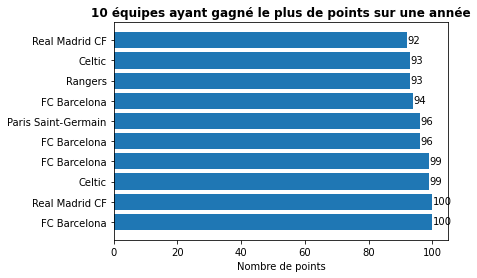

In [58]:
#top 10 des équipes qui gagnent le plus de points sur une année : 
classe=plt.barh([1,2,3,4,5,6,7,8,9,10],ytop_point["year_point"],tick_label=ytop_point["team_long_name"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
plt.xlabel("Nombre de points")
plt.title("10 équipes ayant gagné le plus de points sur une année",fontweight='bold')
plt.show()

C'est le FC Barcelona et le Real Madrid CF qui ont gagné le plus de points sur une année (leur meilleure année).

### ytop_point_fr : meilleure équipe en nombre de points par saison en France

In [59]:
temp1 = year_summary[year_summary["country"]=='France'][["season","team_long_name","year_point"]]
temp1 = temp1.groupby(["season","team_long_name"])["year_point"].max()
temp1 = temp1.reset_index()
temp2 = temp1.groupby(by=["season"])["year_point"].max()
temp2 = temp2.reset_index()
ytop_point_fr = pd.merge(temp1,temp2,how='right',left_on=["season","year_point"],right_on=["season","year_point"])
#ytop_point_fr prend la meilleure équipe française en nombre de points par saison
ytop_point_fr

,season,team_long_name,year_point
0,2008/2009,Girondins de Bordeaux,80
1,2009/2010,Olympique de Marseille,78
2,2010/2011,LOSC Lille,76
3,2011/2012,Montpellier Hérault SC,82
4,2012/2013,Paris Saint-Germain,83
5,2013/2014,Paris Saint-Germain,89
6,2014/2015,Paris Saint-Germain,83
7,2015/2016,Paris Saint-Germain,96


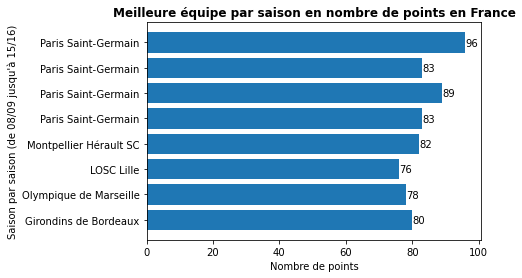

In [60]:
#meilleure équipe par année en nombre de points en France : 
classe=plt.barh(ytop_point_fr.index,ytop_point_fr["year_point"],tick_label=ytop_point_fr["team_long_name"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
plt.xlabel("Nombre de points")
plt.ylabel("Saison par saison (de 08/09 jusqu'à 15/16)")
plt.title("Meilleure équipe par saison en nombre de points en France",fontweight='bold')
plt.show()

On peut observé que Paris est largement en tête

### Régularité de Paris, Lyon et Marseille en termes de points

<ipython-input-61-5119797b691a>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.xaxis.set_ticklabels(['08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15','15/16'])


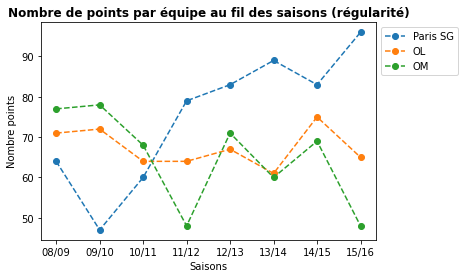

In [61]:
psg=year_summary[year_summary["team_long_name"]=='Paris Saint-Germain'][["season","year_point"]]

ol=year_summary[year_summary["team_long_name"]=='Olympique Lyonnais'][["season","year_point"]]

om=year_summary[year_summary["team_long_name"]=='Olympique de Marseille'][["season","year_point"]]

#import seaborn as sb
#sb.set()

x=psg["season"]
y1=psg["year_point"]
y2=ol["year_point"]
y3=om["year_point"]
plt.plot(x,y1,"o--",label='Paris SG')
plt.plot(x,y2,"o--",label='OL')
plt.plot(x,y3,"o--",label='OM')
axes = plt.gca()
axes.xaxis.set_ticklabels(['08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15','15/16'])
plt.xlabel ('Saisons')
plt.ylabel("Nombre points")
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Nombre de points par équipe au fil des saisons (régularité)',fontweight='bold');
plt.show()

#on voit comme prévu une forte corrélation entre le nombre de victoire et le nombre de points 
#ce qui nous fait dire que les matchs nuls ont peu d'importance au final dans un classement

### Un exemple de classement obtenu grâce à nos données

In [62]:
fr =year_summary[(year_summary["country"]=='France') & (year_summary["season"]=='2011/2012')]
classement_fr = fr.sort_values(by=["year_point","goal_difference","nb_win"],ascending=False)
classement_fr = classement_fr[["season","team_long_name","year_point","goal_difference","nb_win","nb_draw","team_goal","goal_against"]]
classement_fr.index=([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
classement_fr

#exemple du classement l'année du titre de Montpellier grâce à nos données

,season,team_long_name,year_point,goal_difference,nb_win,nb_draw,team_goal,goal_against
1,2011/2012,Montpellier Hérault SC,82,34,25,7,68,34
2,2011/2012,Paris Saint-Germain,79,34,23,10,75,41
3,2011/2012,LOSC Lille,74,33,21,11,72,39
4,2011/2012,Olympique Lyonnais,64,13,19,7,64,51
5,2011/2012,Girondins de Bordeaux,61,12,16,13,53,41
6,2011/2012,Stade Rennais FC,60,9,17,9,53,44
7,2011/2012,AS Saint-Étienne,57,4,16,9,49,45
8,2011/2012,Toulouse FC,56,3,15,11,37,34
9,2011/2012,Évian Thonon Gaillard FC,50,-1,13,11,54,55
10,2011/2012,Olympique de Marseille,48,4,12,12,45,41


### 3. Nombre de buts : Analyse de l'attaque des équipes

### 10 meilleurs équipes en nombre de buts marqués

In [63]:
# on regroupe par équipe 
general_classement = year_summary.groupby(["team_long_name"])["team_goal"].sum()
general_classement=general_classement.reset_index()
# on ordonne les équipes en fonction de leur nombre de buts total
general_classement=general_classement.sort_values(by=["team_goal"],ascending=False)
general_classement.head()

,team_long_name,team_goal
75,FC Barcelona,849
49,Celtic,695
77,FC Bayern Munich,653
15,Ajax,647
210,Real Madrid CF,623


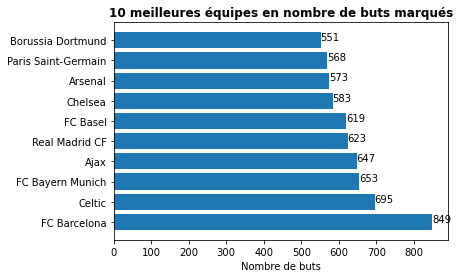

In [64]:
#top 10 des équipes qui marquent le plus au classement général 
top10=general_classement.head(10)
classe=plt.barh(top10["team_long_name"],top10["team_goal"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("10 meilleures équipes en nombre de buts marqués",fontweight='bold')
plt.show()

On observe que c'est le FC Barcelona qui est la meilleure équipe en terme de nombre de buts marqués

### Classement saison par saison des équipes en nombre de buts

In [65]:
#pour home
total_goal_year = year_summary.groupby(["season","team_long_name"])["team_goal"].sum()
total_goal_year=total_goal_year.reset_index()
# on classe les équipes par saison et par nombre de buts 
total_goal_year=total_goal_year.sort_values(by=["season","team_goal"], ascending=[True,False])
total_goal_year.head()

,season,team_long_name,team_goal
44,2008/2009,FC Barcelona,105
18,2008/2009,BSC Young Boys,85
132,2008/2009,Real Madrid CF,83
17,2008/2009,Atlético Madrid,80
33,2008/2009,Celtic,80


In [66]:
# il reste à classer les équipes par saison 
def findSeason(saison):
    res=total_goal_year[total_goal_year["season"]==saison]
    return(res)

In [67]:
#classement des équipes en nombre de buts en fonction des saisons
classementS8_9=findSeason("2008/2009")
classementS9_10=findSeason("2009/2010")
classementS10_11=findSeason("2010/2011")
classementS11_12=findSeason("2011/2012")
classementS12_13=findSeason("2012/2013")
classementS13_14=findSeason("2013/2014")
classementS14_15=findSeason("2014/2015")
classementS15_16=findSeason("2015/2016")

In [68]:
#on regroupe les équipes en faisant la somme des buts et on ne garde que les 10 premières
rankingS8_9=classementS8_9.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS9_10=classementS9_10.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS10_11=classementS10_11.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS11_12=classementS11_12.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS12_13=classementS12_13.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS13_14=classementS13_14.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS14_15=classementS14_15.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS15_16=classementS15_16.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)

In [69]:
#on ordonne les équipes selon leur nombre total de buts pour pouvoir faire un classement 
rankingS8_9=rankingS8_9.sort_values(by=["team_goal"], ascending=False)
rankingS9_10=rankingS9_10.sort_values(by=["team_goal"], ascending=False)
rankingS10_11=rankingS10_11.sort_values(by=["team_goal"], ascending=False)
rankingS11_12=rankingS11_12.sort_values(by=["team_goal"], ascending=False)
rankingS12_13=rankingS12_13.sort_values(by=["team_goal"], ascending=False)
rankingS13_14=rankingS13_14.sort_values(by=["team_goal"], ascending=False)
rankingS14_15=rankingS14_15.sort_values(by=["team_goal"], ascending=False)
rankingS15_16=rankingS15_16.sort_values(by=["team_goal"], ascending=False)

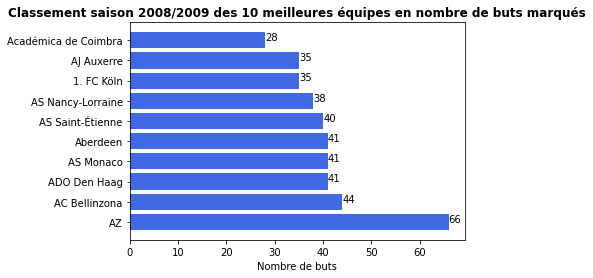

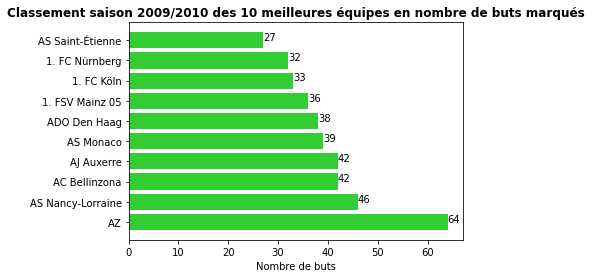

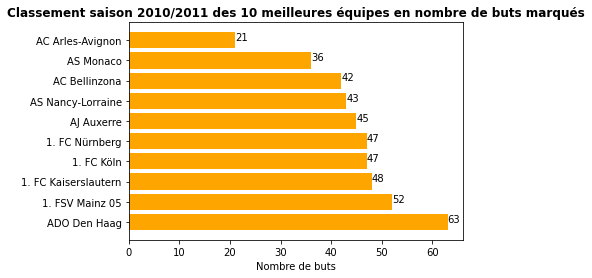

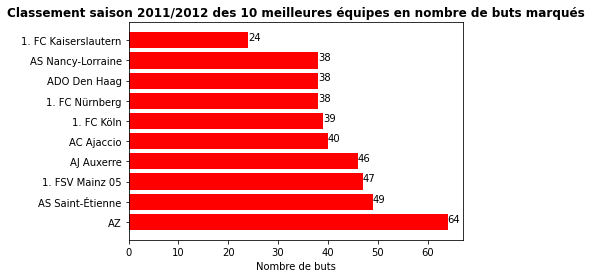

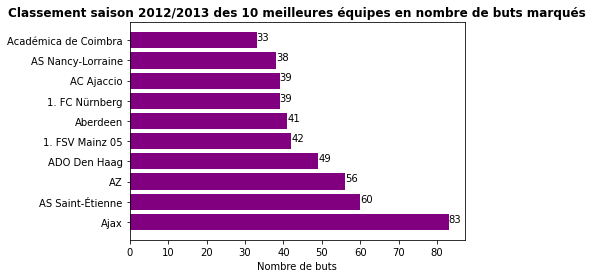

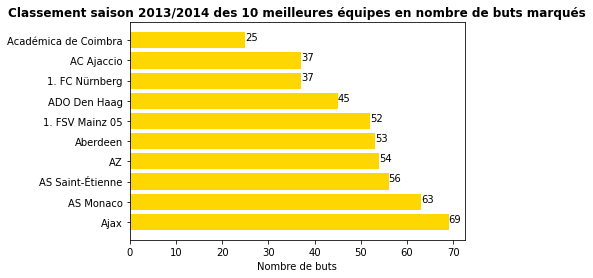

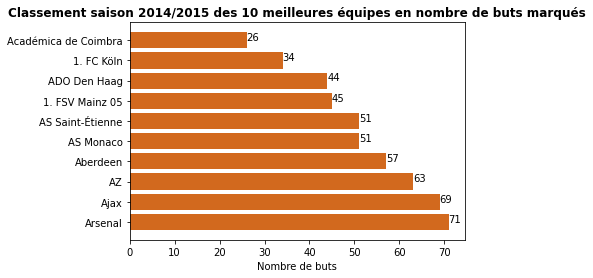

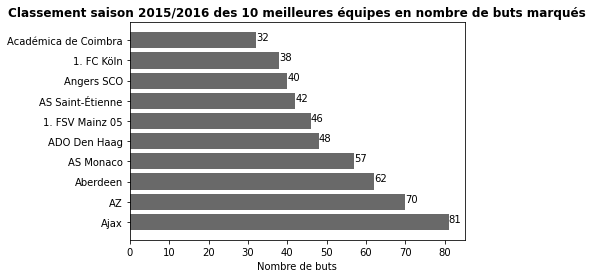

In [70]:
#saison 2008/2009

plt.figure(1)
classe=plt.barh(rankingS8_9["team_long_name"],rankingS8_9["team_goal"],color="royalblue")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Classement saison 2008/2009 des 10 meilleures équipes en nombre de buts marqués",fontweight='bold')
plt.show()
#saison 2009/2010
plt.figure(2)
classe=plt.barh(rankingS9_10["team_long_name"],rankingS9_10["team_goal"],color="limegreen")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Classement saison 2009/2010 des 10 meilleures équipes en nombre de buts marqués",fontweight='bold')
plt.show()
#saison 2010/2011
plt.figure(3)
classe=plt.barh(rankingS10_11["team_long_name"],rankingS10_11["team_goal"],color="orange")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Classement saison 2010/2011 des 10 meilleures équipes en nombre de buts marqués",fontweight='bold')
plt.show()
#saison 2011/2012
plt.figure(4)
classe=plt.barh(rankingS11_12["team_long_name"],rankingS11_12["team_goal"],color="red")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Classement saison 2011/2012 des 10 meilleures équipes en nombre de buts marqués",fontweight='bold')
plt.show()
#saison 2012/2013
plt.figure(5)
classe=plt.barh(rankingS12_13["team_long_name"],rankingS12_13["team_goal"],color="purple")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Classement saison 2012/2013 des 10 meilleures équipes en nombre de buts marqués",fontweight='bold')
plt.show()
#saison 2013/2014
plt.figure(6)
classe=plt.barh(rankingS13_14["team_long_name"],rankingS13_14["team_goal"],color="gold")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Classement saison 2013/2014 des 10 meilleures équipes en nombre de buts marqués",fontweight='bold')
plt.show()
#saison 2014/2015
plt.figure(7)
classe=plt.barh(rankingS14_15["team_long_name"],rankingS14_15["team_goal"],color="chocolate")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Classement saison 2014/2015 des 10 meilleures équipes en nombre de buts marqués",fontweight='bold')
plt.show()
#saison 2015/2016
plt.figure(8)
classe=plt.barh(rankingS15_16["team_long_name"],rankingS15_16["team_goal"],color="dimgray")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Classement saison 2015/2016 des 10 meilleures équipes en nombre de buts marqués",fontweight='bold')
plt.show()

#### Les 10 meilleures performances sur une année en nombre de buts

In [71]:
# top 10 des équipes qui ont le plus marqué sur une année
y_goal=year_summary.sort_values(by="team_goal",ascending=False)
y_goal=y_goal[["country","season","team_long_name","team_goal"]]
top_goal=y_goal.head(10)
top_goal.index=[1,2,3,4,5,6,7,8,9,10]
top_goal

,country,season,team_long_name,team_goal
1,Spain,2011/2012,Real Madrid CF,121
2,Spain,2012/2013,FC Barcelona,115
3,Spain,2011/2012,FC Barcelona,114
4,Spain,2015/2016,FC Barcelona,112
5,Spain,2014/2015,FC Barcelona,110
6,Spain,2015/2016,Real Madrid CF,110
7,Netherlands,2009/2010,Ajax,106
8,Spain,2008/2009,FC Barcelona,105
9,Spain,2013/2014,Real Madrid CF,104
10,England,2009/2010,Chelsea,103


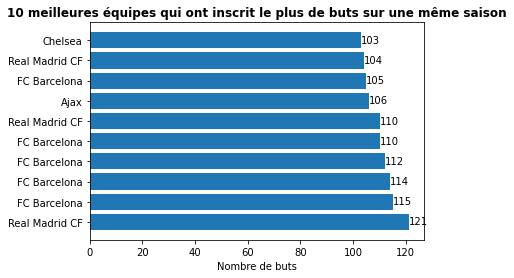

In [72]:
classe=plt.barh(top_goal.index,top_goal["team_goal"],tick_label=top_goal["team_long_name"],)
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 3
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("10 meilleures équipes qui ont inscrit le plus de buts sur une même saison",fontweight='bold')
plt.show()

On voit que le FC Barcelona gagne beaucoup plus que les autres équipes

### Au niveau de la France 

In [73]:
France=year_summary[year_summary["country"]=="France"]
France.drop(["team_api_id"],inplace=True,axis=1)
France.head()

C:\Users\Marc\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,season,country,team_long_name,nb_win,nb_draw,year_point,goal_difference,team_goal,home_team_goal,away_team_goal,goal_against,home_against_goal,away_against_goal
10,2008/2009,France,SM Caen,8,13,37,-7,42,22,20,49,17,32
44,2008/2009,France,AS Nancy-Lorraine,10,12,42,-9,38,19,19,47,19,28
63,2008/2009,France,AJ Auxerre,16,7,55,0,35,18,17,35,12,23
65,2008/2009,France,Olympique de Marseille,22,11,77,32,67,35,32,35,22,13
77,2008/2009,France,LOSC Lille,17,13,64,12,51,34,17,39,20,19


#### 10 meilleures équipes françaises en nombre de victoires (exemple d'utilisation en revenant sur les performances de victoires)

In [74]:
# Equipes françaises qui ont eu le plus de victoires 
#conversion des flottants en entiers
France["nb_win"]=France["nb_win"].astype(int)
France["nb_draw"]=France["nb_draw"].astype(int)
France["year_point"]=France["year_point"].astype(int)

<ipython-input-74-928c310ca26f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  France["nb_win"]=France["nb_win"].astype(int)
<ipython-input-74-928c310ca26f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  France["nb_draw"]=France["nb_draw"].astype(int)
<ipython-input-74-928c310ca26f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [75]:
France_win = France.groupby(["team_long_name"])["nb_win"].sum()
France_win=France_win.reset_index()
France_win.head()

,team_long_name,nb_win
0,AC Ajaccio,22
1,AC Arles-Avignon,3
2,AJ Auxerre,53
3,AS Monaco,95
4,AS Nancy-Lorraine,56


In [76]:
France_win=France_win.sort_values(by="nb_win",ascending=False)
top_France_win=France_win.head(10)
top_France_win.index=[1,2,3,4,5,6,7,8,9,10]
top_France_win

,team_long_name,nb_win
1,Paris Saint-Germain,175
2,Olympique Lyonnais,153
3,LOSC Lille,147
4,Olympique de Marseille,143
5,Girondins de Bordeaux,126
6,AS Saint-Étienne,121
7,Stade Rennais FC,111
8,OGC Nice,106
9,FC Lorient,97
10,Montpellier Hérault SC,96


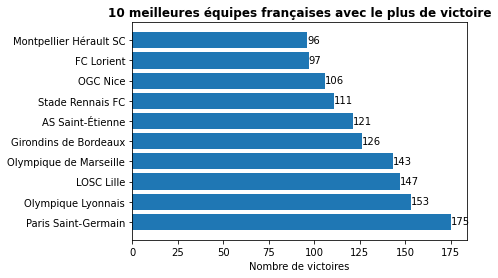

In [77]:
classe=plt.barh(top_France_win.index,top_France_win["nb_win"],tick_label=top_France_win["team_long_name"],)
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 3
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires")
plt.title("10 meilleures équipes françaises avec le plus de victoire",fontweight='bold')
plt.show()

#### Classement saison par saison des équipes françaises en nombre de victoires

In [78]:
# on classe les équipes par saison et par nombre de victoires 
France_win_year=France.sort_values(by=["season","nb_win"], ascending=[True,False])
France_win_year.drop(["team_goal","nb_draw","year_point","home_team_goal","away_team_goal"],axis=1,inplace=True)
France_win_year.head()

,season,country,team_long_name,nb_win,goal_difference,goal_against,home_against_goal,away_against_goal
115,2008/2009,France,Girondins de Bordeaux,24,30,34,12,22
65,2008/2009,France,Olympique de Marseille,22,32,35,22,13
96,2008/2009,France,Olympique Lyonnais,20,23,29,15,14
119,2008/2009,France,Paris Saint-Germain,19,11,38,17,21
77,2008/2009,France,LOSC Lille,17,12,39,20,19


In [79]:
# il reste à classer les équipes par saison 
def findSeason_win(saison):
    res=France_win_year[France_win_year["season"]==saison]
    return(res)

In [80]:
#classement des équipes en nombre de victoires en fonction des saisons
rank_winS8_9=findSeason_win("2008/2009")
rank_winS9_10=findSeason_win("2009/2010")
rank_winS10_11=findSeason_win("2010/2011")
rank_winS11_12=findSeason_win("2011/2012")
rank_winS12_13=findSeason_win("2012/2013")
rank_winS13_14=findSeason_win("2013/2014")
rank_winS14_15=findSeason_win("2014/2015")
rank_winS15_16=findSeason_win("2015/2016")

In [81]:
#on regroupe les équipes en faisant la somme des victoires et on ne garde que les 10 premières
rankingS8_9=rank_winS8_9.groupby(["season","team_long_name"])["nb_win"].sum().reset_index().head(10)
rankingS9_10=rank_winS9_10.groupby(["season","team_long_name"])["nb_win"].sum().reset_index().head(10)
rankingS10_11=rank_winS10_11.groupby(["season","team_long_name"])["nb_win"].sum().reset_index().head(10)
rankingS11_12=rank_winS11_12.groupby(["season","team_long_name"])["nb_win"].sum().reset_index().head(10)
rankingS12_13=rank_winS12_13.groupby(["season","team_long_name"])["nb_win"].sum().reset_index().head(10)
rankingS13_14=rank_winS13_14.groupby(["season","team_long_name"])["nb_win"].sum().reset_index().head(10)
rankingS14_15=rank_winS14_15.groupby(["season","team_long_name"])["nb_win"].sum().reset_index().head(10)
rankingS15_16=rank_winS15_16.groupby(["season","team_long_name"])["nb_win"].sum().reset_index().head(10)

In [82]:
#on ordonne les équipes selon leur nombre total de victoires pour pouvoir faire un classement 
rankingS8_9=rankingS8_9.sort_values(by=["nb_win"], ascending=False)
rankingS9_10=rankingS9_10.sort_values(by=["nb_win"], ascending=False)
rankingS10_11=rankingS10_11.sort_values(by=["nb_win"], ascending=False)
rankingS11_12=rankingS11_12.sort_values(by=["nb_win"], ascending=False)
rankingS12_13=rankingS12_13.sort_values(by=["nb_win"], ascending=False)
rankingS13_14=rankingS13_14.sort_values(by=["nb_win"], ascending=False)
rankingS14_15=rankingS14_15.sort_values(by=["nb_win"], ascending=False)
rankingS15_16=rankingS15_16.sort_values(by=["nb_win"], ascending=False)

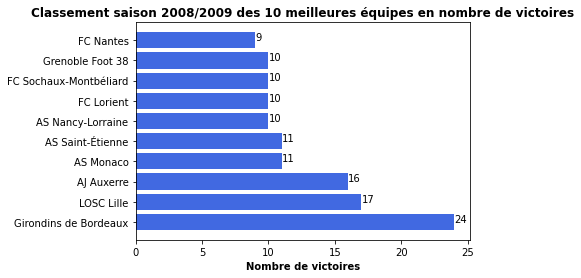

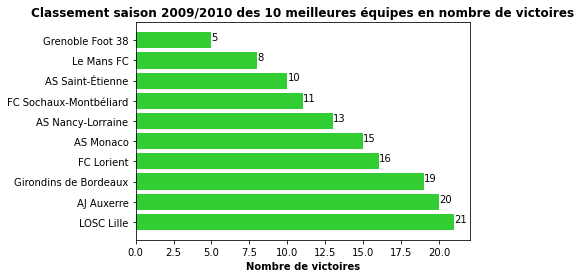

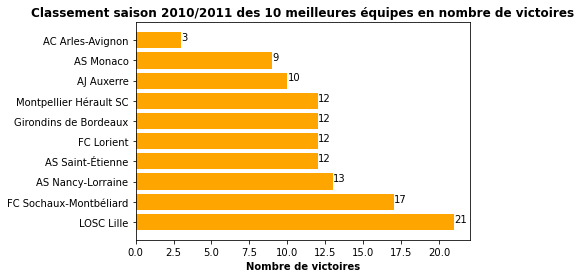

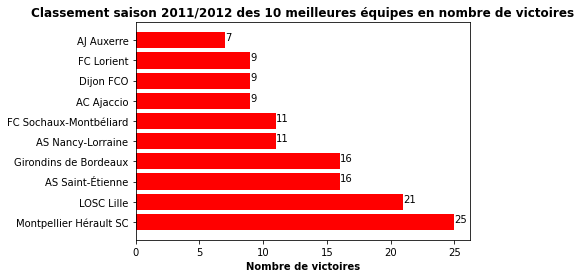

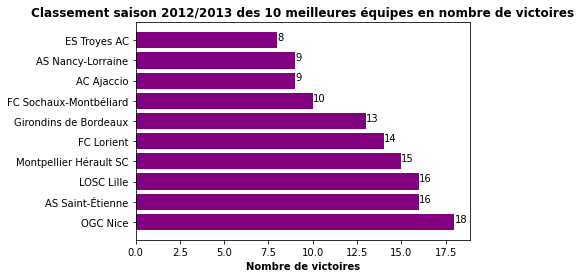

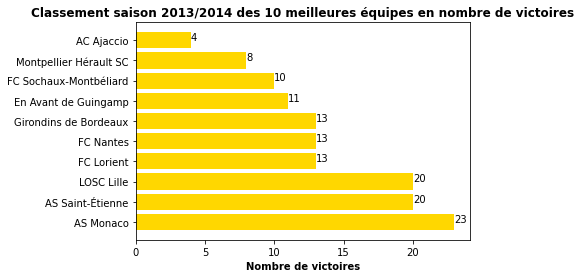

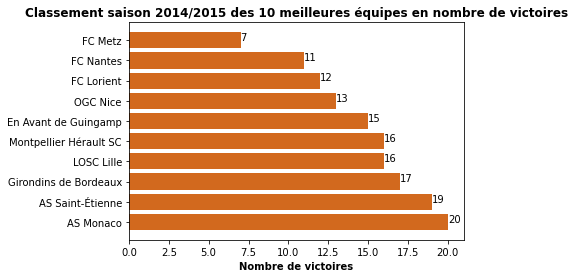

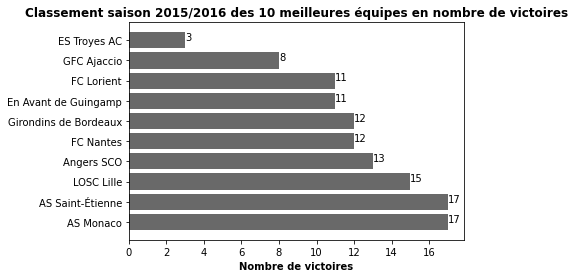

In [83]:
# affichage des classements par saison

plt.figure(1)
classe=plt.barh(rankingS8_9["team_long_name"],rankingS8_9["nb_win"],color="royalblue")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires",fontweight='bold')
plt.title("Classement saison 2008/2009 des 10 meilleures équipes en nombre de victoires",fontweight='bold')
plt.show()

plt.figure(2)
classe=plt.barh(rankingS9_10["team_long_name"],rankingS9_10["nb_win"],color="limegreen")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires",fontweight='bold')
plt.title("Classement saison 2009/2010 des 10 meilleures équipes en nombre de victoires",fontweight='bold')
plt.show()

plt.figure(3)
classe=plt.barh(rankingS10_11["team_long_name"],rankingS10_11["nb_win"],color="orange")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires",fontweight='bold')
plt.title("Classement saison 2010/2011 des 10 meilleures équipes en nombre de victoires",fontweight='bold')
plt.show()

plt.figure(4)
classe=plt.barh(rankingS11_12["team_long_name"],rankingS11_12["nb_win"],color="red")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires",fontweight='bold')
plt.title("Classement saison 2011/2012 des 10 meilleures équipes en nombre de victoires",fontweight='bold')
plt.show()

plt.figure(5)
classe=plt.barh(rankingS12_13["team_long_name"],rankingS12_13["nb_win"],color="purple")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires",fontweight='bold')
plt.title("Classement saison 2012/2013 des 10 meilleures équipes en nombre de victoires",fontweight='bold')
plt.show()


plt.figure(6)
classe=plt.barh(rankingS13_14["team_long_name"],rankingS13_14["nb_win"],color="gold")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires",fontweight='bold')
plt.title("Classement saison 2013/2014 des 10 meilleures équipes en nombre de victoires",fontweight='bold')
plt.show()


plt.figure(7)
classe=plt.barh(rankingS14_15["team_long_name"],rankingS14_15["nb_win"],color="chocolate")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires",fontweight='bold')
plt.title("Classement saison 2014/2015 des 10 meilleures équipes en nombre de victoires",fontweight='bold')
plt.show()


plt.figure(8)
classe=plt.barh(rankingS15_16["team_long_name"],rankingS15_16["nb_win"],color="dimgray")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de victoires",fontweight='bold')
plt.title("Classement saison 2015/2016 des 10 meilleures équipes en nombre de victoires",fontweight='bold')
plt.show()


#### 10 meilleures équipes françaises en nombre de buts général (on revient aux performances sur le nombre de buts)

In [84]:
France_goal = France.groupby(["team_long_name"])["team_goal"].sum()
France_goal=France_goal.reset_index()
France_goal.head()

,team_long_name,team_goal
0,AC Ajaccio,116
1,AC Arles-Avignon,21
2,AJ Auxerre,168
3,AS Monaco,287
4,AS Nancy-Lorraine,203


In [85]:
France_goal=France_goal.sort_values(by="team_goal",ascending=False)
top_France_goal=France_goal.head(10)
top_France_goal.index=[1,2,3,4,5,6,7,8,9,10]
top_France_goal

,team_long_name,team_goal
1,Paris Saint-Germain,568
2,Olympique Lyonnais,497
3,Olympique de Marseille,462
4,LOSC Lille,450
5,Girondins de Bordeaux,404
6,FC Lorient,378
7,AS Saint-Étienne,371
8,Stade Rennais FC,367
9,OGC Nice,342
10,Toulouse FC,296


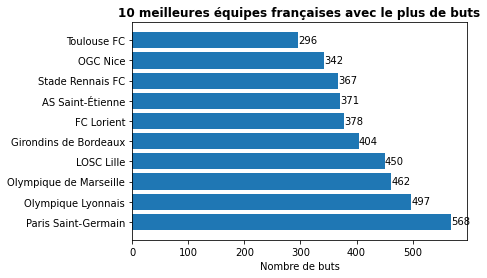

In [86]:
classe=plt.barh(top_France_goal.index,top_France_goal["team_goal"],tick_label=top_France_goal["team_long_name"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 3
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("10 meilleures équipes françaises avec le plus de buts",fontweight='bold')
plt.show()

### Classement saison par saison des équipes françaises en nombre de buts

In [87]:
# on classe les équipes par saison et par nombre de buts 
France_goal_year=France.sort_values(by=["season","team_goal"], ascending=[True,False])
France_goal_year.drop(["nb_win","nb_draw","year_point","home_team_goal","away_team_goal"],axis=1, inplace=True)
France_goal_year.head()

,season,country,team_long_name,goal_difference,team_goal,goal_against,home_against_goal,away_against_goal
65,2008/2009,France,Olympique de Marseille,32,67,35,22,13
115,2008/2009,France,Girondins de Bordeaux,30,64,34,12,22
96,2008/2009,France,Olympique Lyonnais,23,52,29,15,14
77,2008/2009,France,LOSC Lille,12,51,39,20,19
119,2008/2009,France,Paris Saint-Germain,11,49,38,17,21


In [88]:
# il reste à classer les équipes par saison 
def findSeason_goal(saison):
    res=France_goal_year[France_goal_year["season"]==saison]
    return(res)

In [89]:
#classement des équipes en nombre de buts en fonction des saisons
rank_goalS8_9=findSeason_goal("2008/2009")
rank_goalS9_10=findSeason_goal("2009/2010")
rank_goalS10_11=findSeason_goal("2010/2011")
rank_goalS11_12=findSeason_goal("2011/2012")
rank_goalS12_13=findSeason_goal("2012/2013")
rank_goalS13_14=findSeason_goal("2013/2014")
rank_goalS14_15=findSeason_goal("2014/2015")
rank_goalS15_16=findSeason_goal("2015/2016")

#on regroupe les équipes en faisant la somme des victoires et on ne garde que les 10 premières
rankingS8_9=rank_goalS8_9.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS9_10=rank_goalS9_10.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS10_11=rank_goalS10_11.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS11_12=rank_goalS11_12.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS12_13=rank_goalS12_13.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS13_14=rank_goalS13_14.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS14_15=rank_goalS14_15.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)
rankingS15_16=rank_goalS15_16.groupby(["season","team_long_name"])["team_goal"].sum().reset_index().head(10)

#on ordonne les équipes selon leur nombre total de victoires pour pouvoir faire un classement 
rankingS8_9=rankingS8_9.sort_values(by=["team_goal"], ascending=False)
rankingS9_10=rankingS9_10.sort_values(by=["team_goal"], ascending=False)
rankingS10_11=rankingS10_11.sort_values(by=["team_goal"], ascending=False)
rankingS11_12=rankingS11_12.sort_values(by=["team_goal"], ascending=False)
rankingS12_13=rankingS12_13.sort_values(by=["team_goal"], ascending=False)
rankingS13_14=rankingS13_14.sort_values(by=["team_goal"], ascending=False)
rankingS14_15=rankingS14_15.sort_values(by=["team_goal"], ascending=False)
rankingS15_16=rankingS15_16.sort_values(by=["team_goal"], ascending=False)

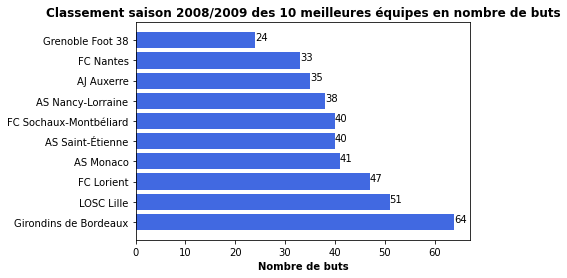

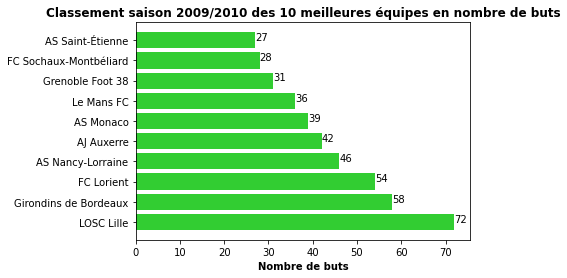

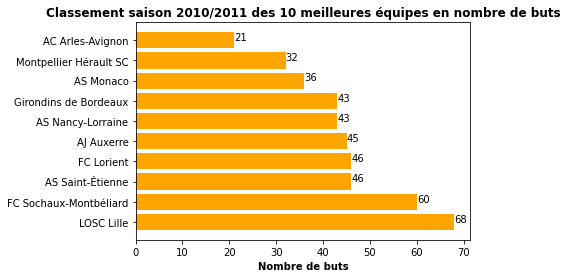

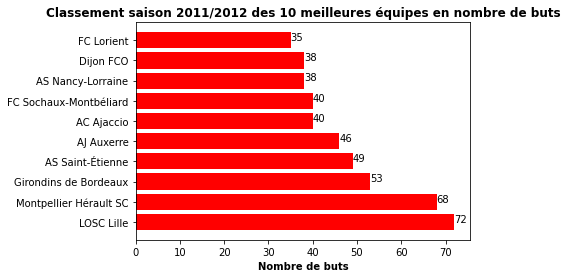

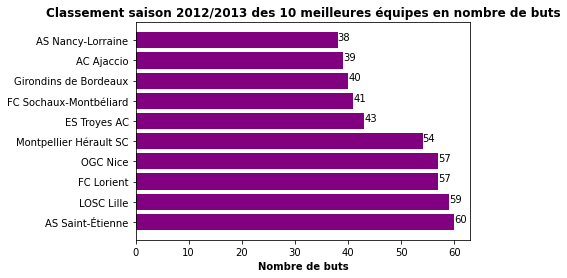

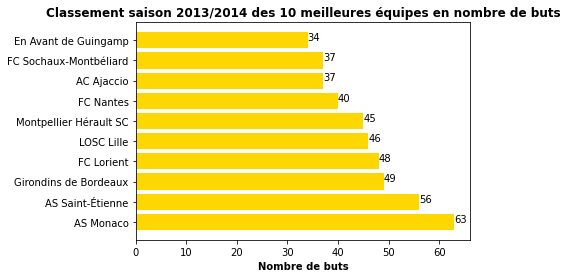

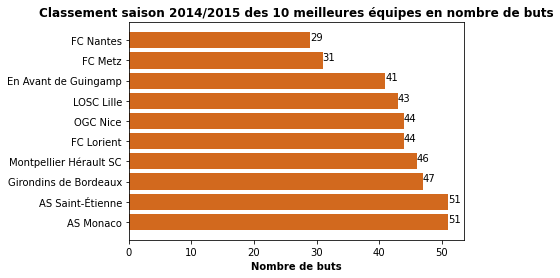

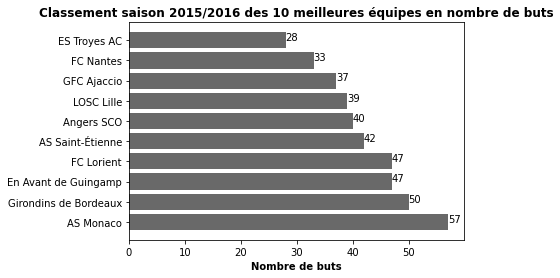

In [90]:
# affichage des classements par saison

plt.figure(1)
classe=plt.barh(rankingS8_9["team_long_name"],rankingS8_9["team_goal"],color="royalblue")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts",fontweight='bold')
plt.title("Classement saison 2008/2009 des 10 meilleures équipes en nombre de buts",fontweight='bold')
plt.show()

plt.figure(2)
classe=plt.barh(rankingS9_10["team_long_name"],rankingS9_10["team_goal"],color="limegreen")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts",fontweight='bold')
plt.title("Classement saison 2009/2010 des 10 meilleures équipes en nombre de buts",fontweight='bold')
plt.show()

plt.figure(3)
classe=plt.barh(rankingS10_11["team_long_name"],rankingS10_11["team_goal"],color="orange")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts",fontweight='bold')
plt.title("Classement saison 2010/2011 des 10 meilleures équipes en nombre de buts",fontweight='bold')
plt.show()

plt.figure(4)
classe=plt.barh(rankingS11_12["team_long_name"],rankingS11_12["team_goal"],color="red")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts",fontweight='bold')
plt.title("Classement saison 2011/2012 des 10 meilleures équipes en nombre de buts",fontweight='bold')
plt.show()

plt.figure(5)
classe=plt.barh(rankingS12_13["team_long_name"],rankingS12_13["team_goal"],color="purple")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts",fontweight='bold')
plt.title("Classement saison 2012/2013 des 10 meilleures équipes en nombre de buts",fontweight='bold')
plt.show()


plt.figure(6)
classe=plt.barh(rankingS13_14["team_long_name"],rankingS13_14["team_goal"],color="gold")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts",fontweight='bold')
plt.title("Classement saison 2013/2014 des 10 meilleures équipes en nombre de buts",fontweight='bold')
plt.show()


plt.figure(7)
classe=plt.barh(rankingS14_15["team_long_name"],rankingS14_15["team_goal"],color="chocolate")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts",fontweight='bold')
plt.title("Classement saison 2014/2015 des 10 meilleures équipes en nombre de buts",fontweight='bold')
plt.show()


plt.figure(8)
classe=plt.barh(rankingS15_16["team_long_name"],rankingS15_16["team_goal"],color="dimgray")
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts",fontweight='bold')
plt.title("Classement saison 2015/2016 des 10 meilleures équipes en nombre de buts",fontweight='bold')
plt.show()

### 4. Nombre de buts encaissés : Analyse de la défense des équipes

In [91]:
defense = year_summary.groupby(["country","team_long_name"])[["goal_against","home_against_goal","away_against_goal"]].sum()
#defense.reset_index()
defense = defense.sort_values(by="goal_against")
defense = defense.reset_index()
defense.head()

,country,team_long_name,goal_against,home_against_goal,away_against_goal
0,Portugal,Amadora,38,15,23
1,France,Angers SCO,38,15,23
2,Portugal,Trofense,42,21,21
3,Germany,FC Ingolstadt 04,42,18,24
4,Poland,Termalica Bruk-Bet Nieciecza,43,19,24


### Les 10 équipes qui encaissent le moins de buts sur les années étudiées

In [92]:
top_defense = defense.copy()
top_defense=top_defense.head(10)
top_defense

,country,team_long_name,goal_against,home_against_goal,away_against_goal
0,Portugal,Amadora,38,15,23
1,France,Angers SCO,38,15,23
2,Portugal,Trofense,42,21,21
3,Germany,FC Ingolstadt 04,42,18,24
4,Poland,Termalica Bruk-Bet Nieciecza,43,19,24
5,Portugal,Feirense,49,19,30
6,Portugal,Portimonense,49,24,25
7,Portugal,Uniao da Madeira,50,17,33
8,England,Watford,50,19,31
9,Belgium,KAS Eupen,50,22,28


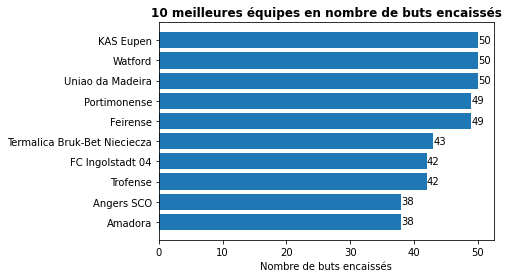

In [93]:
classe=plt.barh(top_defense["team_long_name"],top_defense["goal_against"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts encaissés")
plt.title("10 meilleures équipes en nombre de buts encaissés",fontweight='bold')
plt.show()

### Les 10 équipes qui encaissent le plus de buts sur les années étudiées

In [94]:
bad_defense = defense.copy()
bad_defense=bad_defense.tail(10)
bad_defense=bad_defense.reset_index()
bad_defense

,index,country,team_long_name,goal_against,home_against_goal,away_against_goal
0,285,Germany,TSG 1899 Hoffenheim,434,188,246
1,286,Scotland,Dundee United,435,194,241
2,287,England,Sunderland,441,181,260
3,288,Germany,VfB Stuttgart,441,195,246
4,289,Scotland,Motherwell,446,201,245
5,290,Spain,Getafe CF,457,179,278
6,291,Scotland,Kilmarnock,457,238,219
7,292,England,Aston Villa,462,198,264
8,293,Netherlands,ADO Den Haag,468,200,268
9,294,Germany,SV Werder Bremen,471,203,268


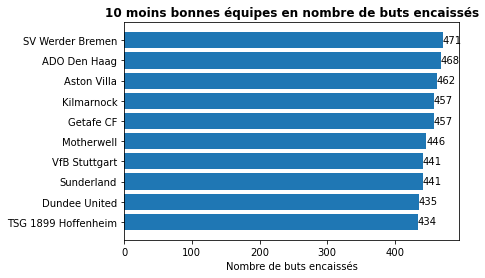

In [95]:
#10 équipes qui encaissent le plus de buts sur les années étudiées : 
classe=plt.barh(bad_defense["team_long_name"],width=bad_defense["goal_against"],height=0.8)
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width, label_y, s=f'{width}')
plt.xlabel("Nombre de buts encaissés")
plt.title("10 moins bonnes équipes en nombre de buts encaissés",fontweight='bold')
plt.show()

### 10 meilleurs performance sur une année en nombre de buts encaissés 

In [96]:
y_defense=year_summary.sort_values(by="goal_against")
y_defense = y_defense[["country","season","team_long_name","goal_against"]]
ytop_defense = y_defense.head(10)
ytop_defense.index=[1,2,3,4,4,6,7,8,8,8]
ytop_defense

,country,season,team_long_name,goal_against
1,Portugal,2014/2015,FC Porto,13
2,Portugal,2012/2013,FC Porto,14
3,Portugal,2010/2011,FC Porto,16
4,Portugal,2014/2015,SL Benfica,16
4,Poland,2008/2009,Legia Warszawa,17
6,Poland,2011/2012,Legia Warszawa,17
7,Germany,2015/2016,FC Bayern Munich,17
8,Scotland,2014/2015,Celtic,17
8,Portugal,2008/2009,FC Porto,18
8,Germany,2014/2015,FC Bayern Munich,18


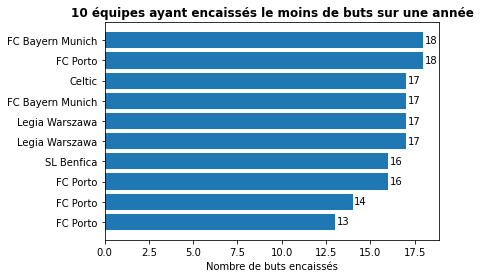

In [97]:
classe=plt.barh([1,2,3,4,5,6,7,8,9,10],ytop_defense["goal_against"],tick_label=ytop_defense["team_long_name"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
plt.xlabel("Nombre de buts encaissés")
plt.title("10 équipes ayant encaissés le moins de buts sur une année",fontweight='bold')
plt.show()

### 10 moins bonnes performance sur une année en nombre de buts encaissés 

In [98]:
ybad_defense = y_defense.iloc[1432:1442,:]
ybad_defense.index=[1,2,3,4,5,6,7,8,9,10]
ybad_defense

,country,season,team_long_name,goal_against
1,England,2011/2012,Wolverhampton Wanderers,82
2,England,2009/2010,Burnley,82
3,Scotland,2011/2012,Dunfermline Athletic,82
4,France,2015/2016,ES Troyes AC,83
5,Italy,2012/2013,Pescara,84
6,England,2013/2014,Fulham,85
7,Switzerland,2008/2009,FC Vaduz,85
8,Switzerland,2009/2010,FC Aarau,88
9,Switzerland,2009/2010,AC Bellinzona,92
10,Netherlands,2010/2011,Willem II,98


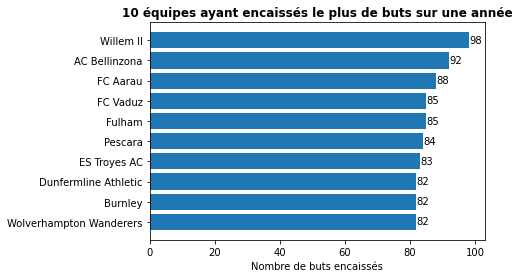

In [99]:
classe=plt.barh([1,2,3,4,5,6,7,8,9,10],ybad_defense["goal_against"],tick_label=ybad_defense["team_long_name"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
plt.xlabel("Nombre de buts encaissés")
plt.title("10 équipes ayant encaissés le plus de buts sur une année",fontweight='bold')
plt.show()

## Au niveau de la France

### Meilleure équipe saison par saison en nombre de buts encaissés en France

In [100]:
temp1 = year_summary[year_summary["country"]=='France'][["season","team_long_name","goal_against"]]
temp1 = temp1.groupby(["season","team_long_name"])["goal_against"].min()
temp1 = temp1.reset_index()
temp2 = temp1.groupby(by=["season"])["goal_against"].min()
temp2 = temp2.reset_index()
ytop_defense_fr = pd.merge(temp1,temp2,how='right',left_on=["season","goal_against"],right_on=["season","goal_against"])
ytop_defense_fr

,season,team_long_name,goal_against
0,2008/2009,Toulouse FC,27
1,2009/2010,AJ Auxerre,29
2,2010/2011,Stade Rennais FC,35
3,2011/2012,Montpellier Hérault SC,34
4,2011/2012,Toulouse FC,34
5,2012/2013,Paris Saint-Germain,23
6,2013/2014,Paris Saint-Germain,23
7,2014/2015,AS Monaco,26
8,2015/2016,Paris Saint-Germain,19


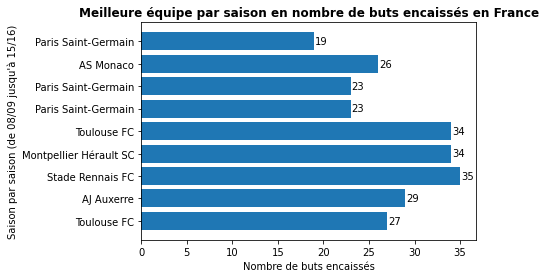

In [101]:
classe=plt.barh(ytop_defense_fr.index,ytop_defense_fr["goal_against"],tick_label=ytop_defense_fr["team_long_name"])
for  bar in classe:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
plt.xlabel("Nombre de buts encaissés")
plt.ylabel("Saison par saison (de 08/09 jusqu'à 15/16)")
plt.title("Meilleure équipe par saison en nombre de buts encaissés en France",fontweight='bold')
plt.show()

### Etude sur la régularité de 3 équipes bien connues en France concernant les buts encaissés

<ipython-input-102-c6e211aa9099>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.xaxis.set_ticklabels(['08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15','15/16'])


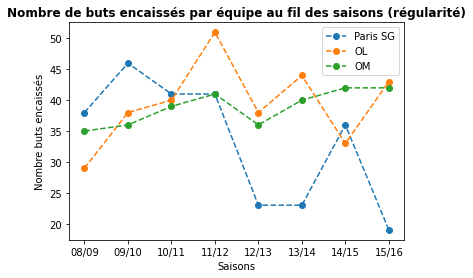

In [102]:
psg=year_summary[year_summary["team_long_name"]=='Paris Saint-Germain'][["season","goal_against"]]

ol=year_summary[year_summary["team_long_name"]=='Olympique Lyonnais'][["season","goal_against"]]

om=year_summary[year_summary["team_long_name"]=='Olympique de Marseille'][["season","goal_against"]]

#import seaborn as sb
#sb.set()

x=psg["season"]
y1=psg["goal_against"]
y2=ol["goal_against"]
y3=om["goal_against"]
plt.plot(x,y1,"o--",label='Paris SG')
plt.plot(x,y2,"o--",label='OL')
plt.plot(x,y3,"o--",label='OM')
axes = plt.gca()
axes.xaxis.set_ticklabels(['08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15','15/16'])
plt.xlabel ('Saisons')
plt.ylabel("Nombre buts encaissés")
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Nombre de buts encaissés par équipe au fil des saisons (régularité)',fontweight='bold');
plt.show()

#on voit comme prévu une forte corrélation entre le nombre de buts encaissés et le nombre de points 
#ce qui nous fait dire que c'est souvent les meilleurs défense qui gagnent un championnat

### 5. Comparaison buts marqués/encaissés

### Au niveau de la France 

In [103]:
goal=year_summary.drop(["nb_win","nb_draw","team_api_id"],axis=1)
goal=goal.reset_index()
goal_F=goal.copy()
goal_F=goal_F.reset_index()

# on ne garde que la France 
goal_F=goal_F[goal_F["country"]=='France']
goal_F.head(5)

,level_0,index,season,country,team_long_name,year_point,goal_difference,team_goal,home_team_goal,away_team_goal,goal_against,home_against_goal,away_against_goal
10,10,10,2008/2009,France,SM Caen,37,-7,42,22,20,49,17,32
44,44,44,2008/2009,France,AS Nancy-Lorraine,42,-9,38,19,19,47,19,28
63,63,63,2008/2009,France,AJ Auxerre,55,0,35,18,17,35,12,23
65,65,65,2008/2009,France,Olympique de Marseille,77,32,67,35,32,35,22,13
77,77,77,2008/2009,France,LOSC Lille,64,12,51,34,17,39,20,19


### On s'intéresse à ces comparaisons pour les 10 meilleures performances en nombre de points sur une saison

In [104]:
goal_F=goal_F.sort_values(by="year_point",ascending=False)
top_goal_F=goal_F.head(10)
top_goal_F

,level_0,index,season,country,team_long_name,year_point,goal_difference,team_goal,home_team_goal,away_team_goal,goal_against,home_against_goal,away_against_goal
1378,1378,1378,2015/2016,France,Paris Saint-Germain,96,83,102,59,43,19,12,7
1019,1019,1019,2013/2014,France,Paris Saint-Germain,89,61,84,51,33,23,7,16
1196,1196,1196,2014/2015,France,Paris Saint-Germain,83,47,83,52,31,36,14,22
843,843,843,2012/2013,France,Paris Saint-Germain,83,46,69,34,35,23,10,13
717,717,717,2011/2012,France,Montpellier Hérault SC,82,34,68,37,31,34,11,23
115,115,115,2008/2009,France,Girondins de Bordeaux,80,30,64,36,28,34,12,22
1015,1015,1015,2013/2014,France,AS Monaco,80,32,63,32,31,31,14,17
659,659,659,2011/2012,France,Paris Saint-Germain,79,34,75,42,33,41,16,25
243,243,243,2009/2010,France,Olympique de Marseille,78,33,69,37,32,36,14,22
65,65,65,2008/2009,France,Olympique de Marseille,77,32,67,35,32,35,22,13


In [105]:
# on rajoute deux colonnes : 
#    1. la somme des buts marqués par équipe
#    2. la somme des buts encaissés par équipe 
top_goal_F=top_goal_F.assign(goal_scored=top_goal_F["home_team_goal"]+top_goal_F["away_team_goal"])
top_goal_F=top_goal_F.assign(goal_conceded=top_goal_F["home_against_goal"]+top_goal_F["away_against_goal"])
top_goal_F

,level_0,index,season,country,team_long_name,year_point,goal_difference,team_goal,home_team_goal,away_team_goal,goal_against,home_against_goal,away_against_goal,goal_scored,goal_conceded
1378,1378,1378,2015/2016,France,Paris Saint-Germain,96,83,102,59,43,19,12,7,102,19
1019,1019,1019,2013/2014,France,Paris Saint-Germain,89,61,84,51,33,23,7,16,84,23
1196,1196,1196,2014/2015,France,Paris Saint-Germain,83,47,83,52,31,36,14,22,83,36
843,843,843,2012/2013,France,Paris Saint-Germain,83,46,69,34,35,23,10,13,69,23
717,717,717,2011/2012,France,Montpellier Hérault SC,82,34,68,37,31,34,11,23,68,34
115,115,115,2008/2009,France,Girondins de Bordeaux,80,30,64,36,28,34,12,22,64,34
1015,1015,1015,2013/2014,France,AS Monaco,80,32,63,32,31,31,14,17,63,31
659,659,659,2011/2012,France,Paris Saint-Germain,79,34,75,42,33,41,16,25,75,41
243,243,243,2009/2010,France,Olympique de Marseille,78,33,69,37,32,36,14,22,69,36
65,65,65,2008/2009,France,Olympique de Marseille,77,32,67,35,32,35,22,13,67,35


####  Répartition des buts à l'extérieur 

In [106]:
top_goal_F_away=top_goal_F.copy()

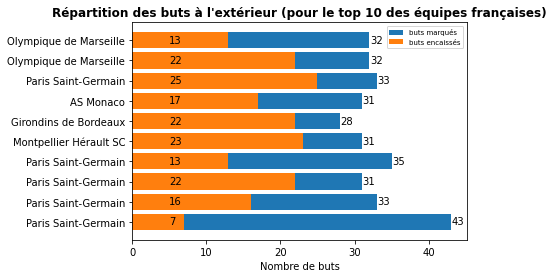

In [107]:
#répartion des buts à L'extérieur : 
classe1=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F_away["away_team_goal"],tick_label=top_goal_F_away["team_long_name"])
for  bar in classe1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
classe2=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F_away["away_against_goal"],tick_label=top_goal_F_away["team_long_name"])
for  bar in classe2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(5, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Répartition des buts à l'extérieur (pour le top 10 des équipes françaises)",fontweight='bold')
name=("buts marqués","buts encaissés")
plt.legend((classe1,classe2),name,fontsize=7)
plt.show()

#### Répartition des buts à domicile

In [108]:
top_goal_F_home=top_goal_F.copy()

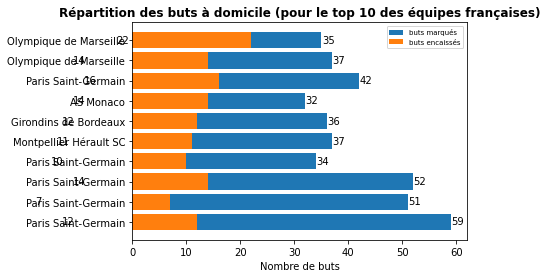

In [109]:
#répartion des buts à domicile : 
classe1=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F_home["home_team_goal"],tick_label=top_goal_F_home["team_long_name"])
for  bar in classe1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
classe2=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F_home["home_against_goal"],tick_label=top_goal_F_away["team_long_name"])
for  bar in classe2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width-25, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Répartition des buts à domicile (pour le top 10 des équipes françaises)",fontweight='bold')
name=("buts marqués","buts encaissés")
plt.legend((classe1,classe2),name,fontsize=7)
plt.show()

#### Répartition des buts par équipes (sans prendre en compte domicile/extérieur)

In [110]:
buts_F=top_goal_F.copy()
#suppression des colonnes inutiles
buts_F.drop(["home_team_goal","home_against_goal","away_team_goal","away_against_goal"],inplace=True,axis=1)
buts_F

,level_0,index,season,country,team_long_name,year_point,goal_difference,team_goal,goal_against,goal_scored,goal_conceded
1378,1378,1378,2015/2016,France,Paris Saint-Germain,96,83,102,19,102,19
1019,1019,1019,2013/2014,France,Paris Saint-Germain,89,61,84,23,84,23
1196,1196,1196,2014/2015,France,Paris Saint-Germain,83,47,83,36,83,36
843,843,843,2012/2013,France,Paris Saint-Germain,83,46,69,23,69,23
717,717,717,2011/2012,France,Montpellier Hérault SC,82,34,68,34,68,34
115,115,115,2008/2009,France,Girondins de Bordeaux,80,30,64,34,64,34
1015,1015,1015,2013/2014,France,AS Monaco,80,32,63,31,63,31
659,659,659,2011/2012,France,Paris Saint-Germain,79,34,75,41,75,41
243,243,243,2009/2010,France,Olympique de Marseille,78,33,69,36,69,36
65,65,65,2008/2009,France,Olympique de Marseille,77,32,67,35,67,35


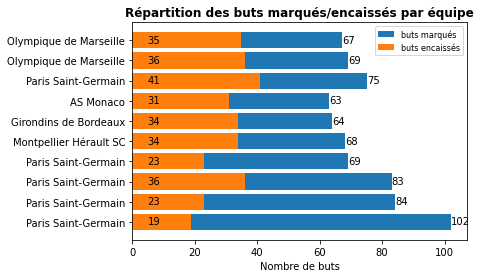

In [111]:
#répartion des buts marqués/encaissés par équipe : 
classe1=plt.barh([1,2,3,4,5,6,7,8,9,10],buts_F["goal_scored"],tick_label=buts_F["team_long_name"])
for  bar in classe1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
classe2=plt.barh([1,2,3,4,5,6,7,8,9,10],buts_F["goal_conceded"],tick_label=buts_F["team_long_name"])
for  bar in classe2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(5, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Répartition des buts marqués/encaissés par équipe",fontweight='bold')
name=("buts marqués","buts encaissés")
plt.legend((classe1,classe2),name,fontsize=8)
plt.show()

### Comparaison buts marqués/encaissés sur l'ensemble des pays

### On fait cette étude sur les équipes qui ont le plus de points sur les années étudiées

In [112]:
goal=year_summary.drop(["nb_win","nb_draw","team_api_id"],axis=1)
goal.head(5)

,season,country,team_long_name,year_point,goal_difference,team_goal,home_team_goal,away_team_goal,goal_against,home_against_goal,away_against_goal
0,2008/2009,Poland,Ruch Chorzów,34,-10,22,13,9,32,11,21
1,2008/2009,Poland,Jagiellonia Białystok,34,-6,28,24,4,34,15,19
2,2008/2009,Poland,Lech Poznań,59,27,51,22,29,24,10,14
3,2008/2009,Poland,P. Warszawa,54,17,40,19,21,23,10,13
4,2008/2009,Poland,Cracovia,30,-16,24,12,12,40,8,32


In [113]:
goal = goal.groupby(["country","team_long_name"])[["home_team_goal","home_against_goal","away_team_goal","away_against_goal","year_point"]].sum()

In [114]:
goal=goal.reset_index()
goal.head()

,country,team_long_name,home_team_goal,home_against_goal,away_team_goal,away_against_goal,year_point
0,Belgium,Beerschot AC,112,98,62,139,162
1,Belgium,Club Brugge KV,193,86,164,135,345
2,Belgium,FCV Dender EH,21,23,23,35,35
3,Belgium,KAA Gent,207,111,172,136,372
4,Belgium,KAS Eupen,15,22,13,28,23


In [115]:
# les 10 meilleures équipes en nombre de points 
goal=goal.sort_values(by="year_point",ascending=False)
goal=goal.reindex()
top_goal=goal.head(10)
top_goal

,country,team_long_name,home_team_goal,home_against_goal,away_team_goal,away_against_goal,year_point
254,Spain,FC Barcelona,495,101,354,131,745
231,Scotland,Celtic,389,88,306,135,704
103,Germany,FC Bayern Munich,382,96,271,115,623
283,Switzerland,FC Basel,344,126,275,185,604
156,Netherlands,Ajax,360,78,287,158,602
81,France,Paris Saint-Germain,332,116,236,151,601
33,England,Chelsea,333,129,250,157,598
211,Portugal,FC Porto,295,65,246,96,591
24,England,Arsenal,306,122,267,198,583
248,Spain,Atlético Madrid,321,124,203,197,560


In [116]:
# on rajoute deux colonnes : 
#    1. la somme des buts marqués par équipe
#    2. la somme des buts encaissés par équipe 
top_goal=top_goal.assign(goal_scored=top_goal["home_team_goal"]+top_goal["away_team_goal"])
top_goal=top_goal.assign(goal_conceded=top_goal["home_against_goal"]+top_goal["away_against_goal"])
top_goal

,country,team_long_name,home_team_goal,home_against_goal,away_team_goal,away_against_goal,year_point,goal_scored,goal_conceded
254,Spain,FC Barcelona,495,101,354,131,745,849,232
231,Scotland,Celtic,389,88,306,135,704,695,223
103,Germany,FC Bayern Munich,382,96,271,115,623,653,211
283,Switzerland,FC Basel,344,126,275,185,604,619,311
156,Netherlands,Ajax,360,78,287,158,602,647,236
81,France,Paris Saint-Germain,332,116,236,151,601,568,267
33,England,Chelsea,333,129,250,157,598,583,286
211,Portugal,FC Porto,295,65,246,96,591,541,161
24,England,Arsenal,306,122,267,198,583,573,320
248,Spain,Atlético Madrid,321,124,203,197,560,524,321


### Répartion des buts à domicile : 

In [117]:
top_goal_home=top_goal.copy()

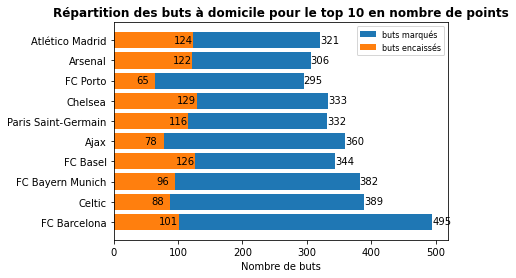

In [118]:
#répartion des buts à domicile : 
classe1=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal["home_team_goal"],tick_label=top_goal["team_long_name"])
for  bar in classe1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
classe2=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal["home_against_goal"],tick_label=top_goal["team_long_name"])
for  bar in classe2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width-30, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Répartition des buts à domicile pour le top 10 en nombre de points",fontweight='bold')
name=("buts marqués","buts encaissés")
plt.legend((classe1,classe2),name,fontsize=8)
plt.show()

### Répartition des buts à l'extérieur :

In [119]:
top_goal_away=top_goal.copy()

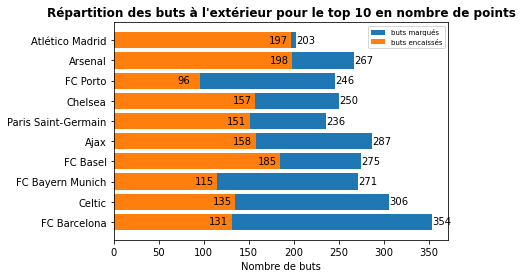

In [120]:
#répartion des buts à L'extérieur : 
classe1=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal["away_team_goal"],tick_label=top_goal["team_long_name"])
for  bar in classe1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
classe2=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal["away_against_goal"],tick_label=top_goal["team_long_name"])
for  bar in classe2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width-25, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Répartition des buts à l'extérieur pour le top 10 en nombre de points",fontweight='bold')
name=("buts marqués","buts encaissés")
plt.legend((classe1,classe2),name,fontsize=7)
plt.show()

Dans le top 10 des équipes en nb de points, on regarde domicile/extérieur 

Conclusion sur la répartition des buts du top 10 des équipes :
    - d'après le 1er graphe, on observe qu'à domicile la différence entre le nombre de buts marqués et encaissés est assez importante
    - d'après le 2eme graphe, on observe qu'à l'extérieur la différence entre le nombre de buts marqués et encaissés et plus petite que sur le 1er graphe

=> les équipes ont donc plus de difficultés lorqu'elles jouent à l'extérieur, cependant elles marquent quand même plus que ce qu'elles encaissent

### Répartion des buts marqués/encaissés par équipe (sans s'occuper de domicile/extérieur)

In [121]:
top_goal

,country,team_long_name,home_team_goal,home_against_goal,away_team_goal,away_against_goal,year_point,goal_scored,goal_conceded
254,Spain,FC Barcelona,495,101,354,131,745,849,232
231,Scotland,Celtic,389,88,306,135,704,695,223
103,Germany,FC Bayern Munich,382,96,271,115,623,653,211
283,Switzerland,FC Basel,344,126,275,185,604,619,311
156,Netherlands,Ajax,360,78,287,158,602,647,236
81,France,Paris Saint-Germain,332,116,236,151,601,568,267
33,England,Chelsea,333,129,250,157,598,583,286
211,Portugal,FC Porto,295,65,246,96,591,541,161
24,England,Arsenal,306,122,267,198,583,573,320
248,Spain,Atlético Madrid,321,124,203,197,560,524,321


In [122]:
buts=top_goal.copy()
#suppression des colonnes inutiles
buts.drop(["home_team_goal","home_against_goal","away_team_goal","away_against_goal"],inplace=True,axis=1)
buts

,country,team_long_name,year_point,goal_scored,goal_conceded
254,Spain,FC Barcelona,745,849,232
231,Scotland,Celtic,704,695,223
103,Germany,FC Bayern Munich,623,653,211
283,Switzerland,FC Basel,604,619,311
156,Netherlands,Ajax,602,647,236
81,France,Paris Saint-Germain,601,568,267
33,England,Chelsea,598,583,286
211,Portugal,FC Porto,591,541,161
24,England,Arsenal,583,573,320
248,Spain,Atlético Madrid,560,524,321


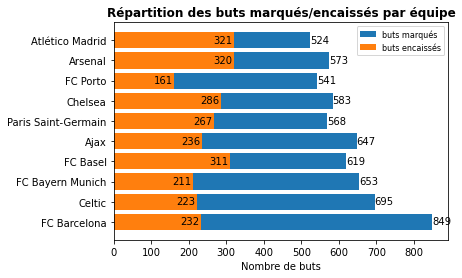

In [123]:
classe1=plt.barh([1,2,3,4,5,6,7,8,9,10],buts["goal_scored"],tick_label=buts["team_long_name"])
for  bar in classe1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
classe2=plt.barh([1,2,3,4,5,6,7,8,9,10],buts["goal_conceded"],tick_label=buts["team_long_name"])
for  bar in classe2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width-55, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Répartition des buts marqués/encaissés par équipe",fontweight='bold')
name=("buts marqués","buts encaissés")
plt.legend((classe1,classe2),name,fontsize=8)
plt.show()

Sur ce dernier graphe, on observe en orange le nombre total de buts encaissés et en blue le nombre total de buts marqués, par équipe sans distinguer domicile/extérieur
=> les équipes qu top 10 en nombre de points marquent bien plus que ce qu'elles encaissent (logique ce sont les meilleures)

### Comparaison des buts marqués/encaissés pour les 10 meilleures équipes françaises en nombre de points global

In [124]:
#goal_F=goal[["country","home_team_goal","home_against_goal","away_team_goal","away_against_goal","year_point"]]
goal_F=goal.copy()
goal_F=goal_F.reset_index()
goal_F.head()

,index,country,team_long_name,home_team_goal,home_against_goal,away_team_goal,away_against_goal,year_point
0,254,Spain,FC Barcelona,495,101,354,131,745
1,231,Scotland,Celtic,389,88,306,135,704
2,103,Germany,FC Bayern Munich,382,96,271,115,623
3,283,Switzerland,FC Basel,344,126,275,185,604
4,156,Netherlands,Ajax,360,78,287,158,602


In [125]:
#on ne garde que la France
goal_F=goal_F[goal_F["country"]=='France']
goal_F.head(5)

,index,country,team_long_name,home_team_goal,home_against_goal,away_team_goal,away_against_goal,year_point
5,81,France,Paris Saint-Germain,332,116,236,151,601
13,79,France,Olympique Lyonnais,289,130,208,186,539
18,75,France,LOSC Lille,270,124,180,165,533
23,80,France,Olympique de Marseille,254,154,208,157,519
29,73,France,Girondins de Bordeaux,228,138,176,197,477


In [126]:
# les 10 meilleures équipes en nombre de points 
goal_F=goal_F.sort_values(by="year_point",ascending=False)
top_goal_F=goal_F.head(10)
top_goal_F

,index,country,team_long_name,home_team_goal,home_against_goal,away_team_goal,away_against_goal,year_point
5,81,France,Paris Saint-Germain,332,116,236,151,601
13,79,France,Olympique Lyonnais,289,130,208,186,539
18,75,France,LOSC Lille,270,124,180,165,533
23,80,France,Olympique de Marseille,254,154,208,157,519
29,73,France,Girondins de Bordeaux,228,138,176,197,477
36,63,France,AS Saint-Étienne,223,138,148,188,445
46,86,France,Stade Rennais FC,205,161,162,193,424
54,78,France,OGC Nice,198,150,144,226,399
63,68,France,FC Lorient,214,154,164,251,382
70,61,France,AS Monaco,153,97,134,140,360


In [127]:
# on rajoute deux colonnes : 
#    1. la somme des buts marqués par équipe
#    2. la somme des buts encaissés par équipe 
top_goal_F=top_goal_F.assign(goal_scored=top_goal_F["home_team_goal"]+top_goal_F["away_team_goal"])
top_goal_F=top_goal_F.assign(goal_conceded=top_goal_F["home_against_goal"]+top_goal_F["away_against_goal"])
top_goal_F

,index,country,team_long_name,home_team_goal,home_against_goal,away_team_goal,away_against_goal,year_point,goal_scored,goal_conceded
5,81,France,Paris Saint-Germain,332,116,236,151,601,568,267
13,79,France,Olympique Lyonnais,289,130,208,186,539,497,316
18,75,France,LOSC Lille,270,124,180,165,533,450,289
23,80,France,Olympique de Marseille,254,154,208,157,519,462,311
29,73,France,Girondins de Bordeaux,228,138,176,197,477,404,335
36,63,France,AS Saint-Étienne,223,138,148,188,445,371,326
46,86,France,Stade Rennais FC,205,161,162,193,424,367,354
54,78,France,OGC Nice,198,150,144,226,399,342,376
63,68,France,FC Lorient,214,154,164,251,382,378,405
70,61,France,AS Monaco,153,97,134,140,360,287,237


### Répartion des buts à domicile 

In [128]:
top_goal_F_home=top_goal_F.copy()

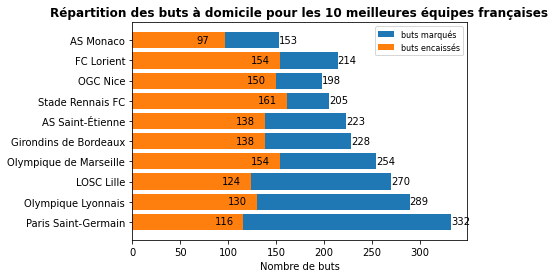

In [129]:
#répartion des buts à domicile : 
classe1=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F_home["home_team_goal"],tick_label=top_goal_F_home["team_long_name"])
for  bar in classe1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
classe2=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F_home["home_against_goal"],tick_label=top_goal_F_home["team_long_name"])
for  bar in classe2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width-30, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Répartition des buts à domicile pour les 10 meilleures équipes françaises",fontweight='bold')
name=("buts marqués","buts encaissés")
plt.legend((classe1,classe2),name,fontsize=8)
plt.show()

Conclusion : Dans le top 10, à domicile, les équipes marquent bien plus que ce qu'elles encaissent

### Répartition des buts à l'extérieur :

In [130]:
top_goal_F_away=top_goal_F.copy()

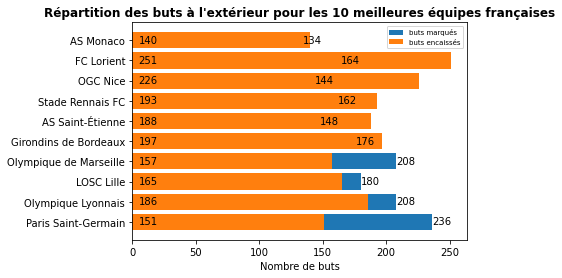

In [131]:
#répartion des buts à L'extérieur : 
classe1=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F_away["away_team_goal"],tick_label=top_goal_F_away["team_long_name"])
for  bar in classe1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
classe2=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F_away["away_against_goal"],tick_label=top_goal_F_away["team_long_name"])
for  bar in classe2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(5, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Répartition des buts à l'extérieur pour les 10 meilleures équipes françaises",fontweight='bold')
name=("buts marqués","buts encaissés")
plt.legend((classe1,classe2),name,fontsize=7)
plt.show()

Conclusion : dans le top 10, il n'y a que l'OM, LOSC Lille, l'OL et le PSG qui marquent plus de buts à l'extérieur que ce qu'elles encaissent. Les autres équipes se font dominer lorqu'elles jouent à l'extérieur

### 6. Répartition des buts (domicile/extérieur) 

### Pour les 10 meilleures équipes en France en nombre de points

### Buts marqués

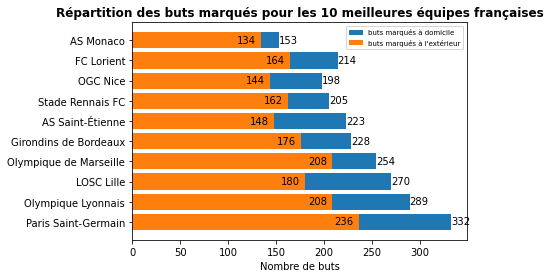

In [132]:
#répartion des buts marqués par équipes  : 
classe1=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F["home_team_goal"],tick_label=top_goal_F["team_long_name"])
for  bar in classe1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
classe2=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F["away_team_goal"],tick_label=top_goal_F["team_long_name"])
for  bar in classe2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width-25, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Répartition des buts marqués pour les 10 meilleures équipes françaises",fontweight='bold')
name=("buts marqués à domicile","buts marqués à l'extérieur")
plt.legend((classe1,classe2),name,fontsize=7)
plt.show()

### Buts encaissés 

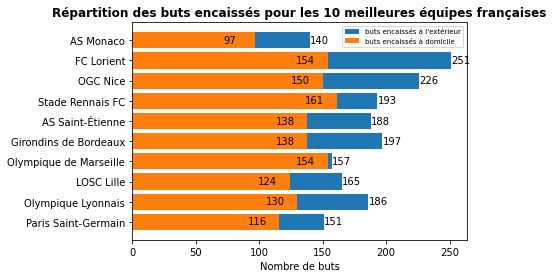

In [133]:
#répartion des buts encaissés par équipes  : 
classe1=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F["away_against_goal"],tick_label=top_goal_F["team_long_name"])
for  bar in classe1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
classe2=plt.barh([1,2,3,4,5,6,7,8,9,10],top_goal_F["home_against_goal"],tick_label=top_goal_F["team_long_name"])
for  bar in classe2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width-25, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Répartition des buts encaissés pour les 10 meilleures équipes françaises",fontweight='bold')
name=("buts encaissés à l'extérieur","buts encaissés à domicile")
plt.legend((classe1,classe2),name,fontsize=7)
plt.show()

### Répartition des buts marqués/encaissés 

In [134]:
buts_F=top_goal_F.copy()
#suppression des colonnes inutiles
buts_F.drop(["home_team_goal","home_against_goal","away_team_goal","away_against_goal"],inplace=True,axis=1)
buts_F

,index,country,team_long_name,year_point,goal_scored,goal_conceded
5,81,France,Paris Saint-Germain,601,568,267
13,79,France,Olympique Lyonnais,539,497,316
18,75,France,LOSC Lille,533,450,289
23,80,France,Olympique de Marseille,519,462,311
29,73,France,Girondins de Bordeaux,477,404,335
36,63,France,AS Saint-Étienne,445,371,326
46,86,France,Stade Rennais FC,424,367,354
54,78,France,OGC Nice,399,342,376
63,68,France,FC Lorient,382,378,405
70,61,France,AS Monaco,360,287,237


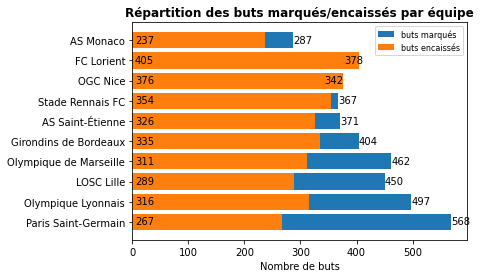

In [135]:
#répartion des buts marqués/encaissés par équipe : 
classe1=plt.barh([1,2,3,4,5,6,7,8,9,10],buts_F["goal_scored"],tick_label=buts_F["team_long_name"])
for  bar in classe1:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(width+0.1, label_y, s=f'{width}')
classe2=plt.barh([1,2,3,4,5,6,7,8,9,10],buts_F["goal_conceded"],tick_label=buts_F["team_long_name"])
for  bar in classe2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height()/3
    plt.text(5, label_y, s=f'{width}')
plt.xlabel("Nombre de buts")
plt.title("Répartition des buts marqués/encaissés par équipe",fontweight='bold')
name=("buts marqués","buts encaissés")
plt.legend((classe1,classe2),name,fontsize=8)
plt.show()

Conclusion : en général, mis à part le FC Lorient et l'OGC Nice, les équipes françaises du top 10 en nombre de points marquent plus de buts que ce qu'elles encaissent.

### 7. L'anecdote : match avec le plus gros écart de buts

In [136]:
data_match["goal_difference"]=abs(data_match["home_team_goal"]-data_match["away_team_goal"])
data_match["goal_difference"].reset_index()
data_match.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,BSH,BSD,BSA,win_home,win_away,result,draw_home,draw_away,country_name,goal_difference
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,...,1.73,3.40,4.20,0,0,nul,9987,9993,Belgium,0
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,...,1.91,3.25,3.60,0,0,nul,10000,9994,Belgium,0
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,...,2.30,3.20,2.75,0,1,8635,0,0,Belgium,3
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,...,1.44,3.75,6.50,1,0,9991,0,0,Belgium,5
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,...,4.75,3.30,1.67,0,1,9985,0,0,Belgium,2


In [137]:
#on trie dans l'odre croissant la différence
goal_difference=data_match["goal_difference"].sort_values(ascending=False)
goal_difference.reset_index()
goal_difference.head()

13898    10
7660      9
20161     9
9761      8
22984     8
Name: goal_difference, dtype: int64

In [138]:
#on cherche la ligne du match au cours duquel il y a eu la plus grosse différence de points (ici 10)
data_match[data_match["goal_difference"] == goal_difference.max()] 

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,BSH,BSD,BSA,win_home,win_away,result,draw_home,draw_away,country_name,goal_difference
13898,13274,13274,2010/2011,10,2010-10-24 00:00:00,836306,8640,10235,10,0,...,1.36,4.33,8.0,1,0,8640,0,0,Netherlands,10


In [139]:
# on cherche les équipes qui se sont affrontées
# home_team_api_id=8640  
# away_team_api_id=10235

In [140]:
#on cherche l'équipe qui était à domicile et qui a gagné
bravo=data_team[data_team["team_api_id"]==8640]["team_long_name"]
print("équipe qui a gagné lors du match avec le plus gros écart :",bravo)
#on cherche l'équipe qui a perdu
perdu=data_team[data_team["team_api_id"]==10235]["team_long_name"]
print("équipe qui a perdu lors de ce match :",perdu)

print("\n Donc c'est le PSV qui a gagné 10-0 contre Feyenoord le 24/10/2010 pour le match avec le plus gros écart")

équipe qui a gagné lors du match avec le plus gros écart : 165    PSV
Name: team_long_name, dtype: object
équipe qui a perdu lors de ce match : 167    Feyenoord
Name: team_long_name, dtype: object

 Donc c'est le PSV qui a gagné 10-0 contre Feyenoord le 24/10/2010 pour le match avec le plus gros écart


# VIII) Les joueurs 

### 1. Age des joueurs 

In [141]:
data_player["age"]=data_player["birthday"]

In [142]:
import datetime
from datetime import date

In [143]:
data_player["age"]=datetime.date(2016,1,1)

In [144]:
data_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-01-01
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,2016-01-01
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,2016-01-01
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,2016-01-01
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,2016-01-01


In [145]:
#convertir la colonne birthday en datetime 
data_player["birthday"]=pd.to_datetime(data_player["birthday"])

In [146]:
data_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2016-01-01
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-01-01
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163,2016-01-01
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198,2016-01-01
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,2016-01-01


In [147]:
#fonction qui permet de calculer l'age 
def calculage(born):
    dat=datetime.date(2016,1,1)
    age = dat.year - born.year - ((dat.month, dat.day) < (born.month, born.day))
    return age 

In [148]:
#application de la fonction calculage à toute la colonne 
data_player["age"]=data_player["birthday"].apply(lambda x: calculage(x))

In [149]:
#affichage de la table pour voir le résultat
data_player.head()
#conversion de l'age ok

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,23
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,26
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163,24
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198,33
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,36


Text(0, 0.5, 'Nombre de joueurs')

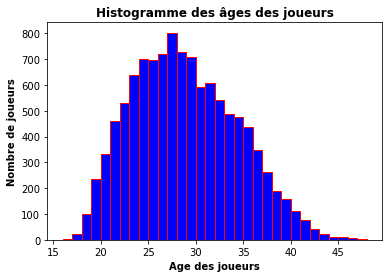

In [150]:
#histogramme des ages
plt.hist(data_player["age"],color="blue",edgecolor="red", bins=32) 
plt.title("Histogramme des âges des joueurs",fontweight='bold')
plt.xlabel("Age des joueurs",fontweight='bold')
plt.ylabel("Nombre de joueurs",fontweight='bold')

In [151]:
#age moyen 
age_moy=data_player["age"].mean()
#age minimal
age_min=data_player["age"].min()
#age maximal
age_max=data_player["age"].max()
print("âge moyen :",age_moy)
print("âge minimal :",age_min)
print("âge maximal :",age_max)

âge moyen : 28.3626582278481
âge minimal : 16
âge maximal : 48


Text(0.5, 1.0, 'Boxplot représentant la répartition des âges des joueurs')

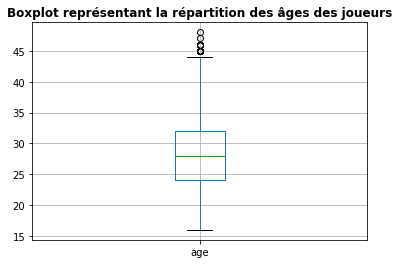

In [152]:
#boxplot des ages
data_player.boxplot(column=["age"])
plt.title("Boxplot représentant la répartition des âges des joueurs",fontweight='bold')

### 2. Poids des joueurs

In [153]:
#conversion du poids en kg
#multiplier par 0.453592

data_player["weight"]=data_player["weight"]*0.453592
#affichge de la table pour voir la conversion du poids
data_player.head(10)

#ATTENTION : NE PAS RELANCER CE CODE SINON LA VALEUR DES POIDS CHANGE !!!

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,84.821704,23
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,66.224432,26
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,73.935496,24
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,89.811216,33
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,69.853168,36
5,6,27316,Aaron Hunt,158138,1986-09-04,182.88,73.028312,29
6,7,564793,Aaron Kuhl,221280,1996-01-30,172.72,66.224432,19
7,8,30895,Aaron Lennon,152747,1987-04-16,165.10,63.049288,28
8,9,528212,Aaron Lennox,206592,1993-02-19,190.50,82.100152,22
9,10,101042,Aaron Meijers,188621,1987-10-28,175.26,77.110640,28


In [154]:
#conversion du poids en entier 
data_player["weight"] = data_player["weight"].astype(int)

Text(0, 0.5, 'Nombre de joueurs')

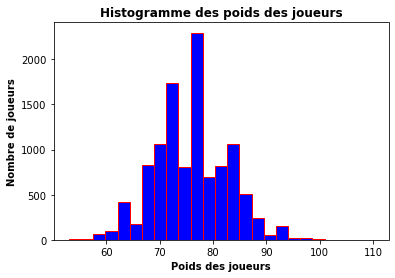

In [155]:
#histogramme des poids 
plt.hist(data_player["weight"],color="blue",edgecolor="red", bins=25) 
plt.title("Histogramme des poids des joueurs",fontweight='bold')
plt.xlabel("Poids des joueurs",fontweight='bold')
plt.ylabel("Nombre de joueurs",fontweight='bold')

In [156]:
#poids moyen
poids_moy=data_player["weight"].mean()
#poids minimal
poids_min=data_player["weight"].min()
#poids maximal
poids_max=data_player["weight"].max()
print("poids moyen :",poids_moy)
print("poids minimal :",poids_min)
print("poids maximal :",poids_max)

poids moyen : 75.9121157323689
poids minimal : 53
poids maximal : 110


Text(0.5, 1.0, 'Boxplot représentant la répartion du poids des joueurs')

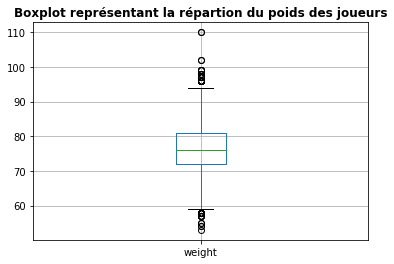

In [157]:
#boxplot des poids 
data_player.boxplot(column=["weight"])
plt.title("Boxplot représentant la répartion du poids des joueurs",fontweight='bold')

### 3. Taille des joueurs

In [158]:
#taille moyenne
taille_moy=data_player["height"].mean()
#taille minimale
taille_min=data_player["height"].min()
#taille maximale
taille_max=data_player["height"].max()
print("taille moyenne :",taille_moy)
print("taille minimale :",taille_min)
print("taille maximale :",taille_max)

taille moyenne : 181.86744484628662
taille minimale : 157.48
taille maximale : 208.28


Text(0, 0.5, 'Nombre de joueurs')

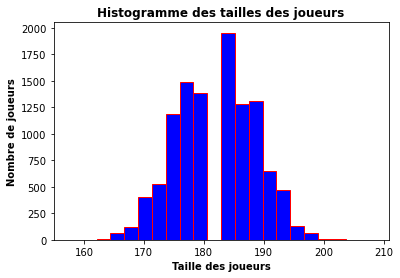

In [159]:
#histogramme des tailles 
plt.hist(data_player["height"],color="blue",edgecolor="red", bins=22) 
plt.title("Histogramme des tailles des joueurs",fontweight='bold')
plt.xlabel("Taille des joueurs",fontweight='bold')
plt.ylabel("Nombre de joueurs",fontweight='bold')

Text(0.5, 1.0, 'Boxplot représentant la répartiton de la taille des joueurs')

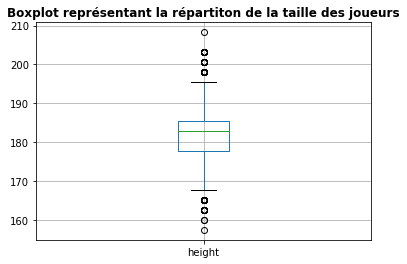

In [160]:
#boxplot des tailles
data_player.boxplot(column=["height"])
plt.title("Boxplot représentant la répartiton de la taille des joueurs",fontweight='bold')

## IX) Corrélation entre les variables les plus utiles de la table player attributes

In [161]:
import seaborn as sns

In [162]:
data_pA=data_playerA.copy()
#on enlève les variables inutiles
data_pA.drop(["id","overall_rating","player_fifa_api_id","positioning","player_api_id","date","attacking_work_rate","preferred_foot","potential","strength","defensive_work_rate","heading_accuracy","volleys","free_kick_accuracy","long_passing","jumping","stamina","penalties","gk_diving","gk_handling","gk_kicking","gk_reflexes","reactions","balance","gk_positioning"],inplace=True, axis=1)

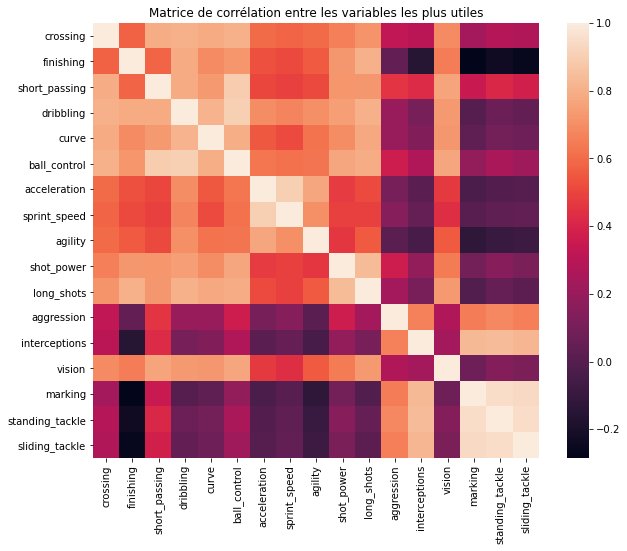

In [163]:
corr_df = data_pA.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df).set_title('Matrice de corrélation entre les variables les plus utiles')
plt.show()

D'après le graphique précédent, on remarque plusieurs choses. D'abord, on distingue que les attaquants se trouvent dans la zone en haut à gauche (bonne qualité de percussion, bonne finition, fort en jeu technique (dribbles), bon contrôle de balle, rapide et forte accélération, bonne agilité et enfin des tirs longs et puissants). Ensuite, on distingue que les défenseurs se trouvent en bas à droite (forte agression, bonne interceptions, bon marquage, et des bons tacles à la fois débout et glissé). Enfin, tous les joueurs doivent avoir une bonne vision et savoir faire des passes courtes (car grosse corrélation avec tous les autres attributs) ce qui est évident pour un joueur de football.

# X) ACP

In [164]:
data_pA=data_playerA.copy()

#Enlève les colonnes inutiles
data_pA.drop(["id","player_fifa_api_id","player_api_id","date","preferred_foot","potential","attacking_work_rate","defensive_work_rate","crossing","heading_accuracy","volleys","free_kick_accuracy","long_passing","ball_control","vision","curve","shot_power","jumping","stamina","penalties","gk_diving","gk_handling","gk_kicking","gk_reflexes","reactions","balance","gk_positioning"],inplace=True, axis=1)
data_pA.head(10)

,overall_rating,finishing,short_passing,dribbling,acceleration,sprint_speed,agility,strength,long_shots,aggression,interceptions,positioning,marking,standing_tackle,sliding_tackle
0,67.0,44.0,61.0,51.0,60.0,64.0,59.0,76.0,35.0,71.0,70.0,45.0,65.0,69.0,69.0
1,67.0,44.0,61.0,51.0,60.0,64.0,59.0,76.0,35.0,71.0,70.0,45.0,65.0,69.0,69.0
2,62.0,44.0,61.0,51.0,60.0,64.0,59.0,76.0,35.0,63.0,41.0,45.0,65.0,66.0,69.0
3,61.0,43.0,60.0,50.0,60.0,64.0,59.0,76.0,34.0,62.0,40.0,44.0,62.0,63.0,66.0
4,61.0,43.0,60.0,50.0,60.0,64.0,59.0,76.0,34.0,62.0,40.0,44.0,62.0,63.0,66.0
5,74.0,53.0,71.0,73.0,79.0,78.0,78.0,56.0,62.0,68.0,67.0,60.0,76.0,75.0,78.0
6,74.0,53.0,71.0,73.0,79.0,78.0,78.0,56.0,60.0,68.0,67.0,60.0,76.0,75.0,78.0
7,73.0,52.0,70.0,71.0,79.0,78.0,78.0,56.0,59.0,67.0,66.0,58.0,76.0,75.0,78.0
8,73.0,51.0,70.0,71.0,79.0,78.0,78.0,56.0,58.0,67.0,66.0,58.0,76.0,75.0,78.0
9,73.0,51.0,70.0,71.0,79.0,78.0,78.0,56.0,58.0,67.0,66.0,58.0,76.0,75.0,78.0


In [165]:
#Chaque colonne note la performence du joueur selon des critères

#overall_rating = note global 
#crossing = traversée
#finishing = finition
#heading_accuracy = précision à la tête
#short_passing = passe courte
#volleys = reprise de volé
#curve ? 
#free_kick_accuracy = précision au coup franc
#long_passing = passe longue
#ball_control = controle de balle
#acceleration = acceleration
#sprint_speed = vitesse en courant
#agility = agilité
#reactions ?
#balance = équilibre 
#shot_power = puissance de frappe
#jumping = saut
#stamina = endurance 
#long_shots = tir long
#aggression = aggression
#interceptions = interceptions
#positioning = positionnement
#vision = vision
#penalties = penalty
#marking = marquage
#standing_tackle = tacle débout
#sliding_tackle = tacle glissé

In [166]:
#verif les valeurs nan ou nulles

check_for_nan = data_pA.isnull().any().any()
print(check_for_nan)

total_nan_values = data_pA.isnull().sum().sum()
print (total_nan_values)

True
16294


In [167]:
#On choisit de remplacer les NaN par la moyenne de la colonne
data_pA=data_pA.fillna(data_pA.mean())
data_pA.describe()

,overall_rating,finishing,short_passing,dribbling,acceleration,sprint_speed,agility,strength,long_shots,aggression,interceptions,positioning,marking,standing_tackle,sliding_tackle
count,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000
mean,68.600015,49.921078,62.429672,59.175154,67.659357,68.051244,65.970910,67.424529,53.339431,60.948046,52.009271,55.786504,46.772242,50.351257,48.001462
std,7.025124,18.995399,14.161782,17.704326,12.953794,12.541130,12.858714,12.044820,18.325247,16.052924,19.405891,18.406330,21.179383,21.434839,21.438934
min,33.000000,1.000000,3.000000,1.000000,10.000000,12.000000,11.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,64.000000,34.000000,57.000000,52.000000,61.000000,62.000000,58.000000,60.000000,41.000000,51.000000,34.000000,45.000000,25.000000,29.000000,25.000000
50%,69.000000,53.000000,65.000000,64.000000,69.000000,69.000000,67.000000,69.000000,58.000000,64.000000,56.000000,60.000000,50.000000,56.000000,52.000000
75%,73.000000,65.000000,72.000000,72.000000,76.000000,77.000000,75.000000,76.000000,67.000000,73.000000,68.000000,69.000000,66.000000,69.000000,67.000000
max,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,97.000000,96.000000,96.000000,96.000000,95.000000,95.000000


In [168]:
print(data_pA.shape)
#nombre d'observations
n = data_pA.shape[0]

#nombre de variables
p = data_pA.shape[1]

(183978, 15)


In [169]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [170]:
#Transformeur
sc = StandardScaler()

In [171]:
#On centre et on réduit notre jeu de données data_playerA
Z = sc.fit_transform(data_pA)
print(Z)

[[-0.22775679 -0.31171199 -0.10095311 ...  0.86063921  0.87002256
   0.97946078]
 [-0.22775679 -0.31171199 -0.10095311 ...  0.86063921  0.87002256
   0.97946078]
 [-0.93948997 -0.31171199 -0.10095311 ...  0.86063921  0.73006311
   0.97946078]
 ...
 [ 1.19570957  1.10968868  1.52314071 ... -0.69748409 -0.90279709
  -0.83966446]
 [ 1.3380562   0.7411774   1.66436626 ... -0.88634752 -0.85614395
  -0.83966446]
 [ 1.62274948  0.95175527  1.80559181 ... -0.41418894 -0.85614395
  -0.83966446]]


In [172]:
#moyenne de chaque variables p (34)
print(np.mean(Z,axis=0))

[-1.69453810e-15  4.88942756e-16 -3.82966538e-16 -8.67274765e-16
 -4.15562721e-17 -4.30084244e-16  1.27634915e-15  4.30084244e-16
  2.72201307e-16  8.40394500e-17  3.34921926e-16  3.19010045e-16
 -4.81373026e-16  5.45638488e-16 -7.87251907e-16]


In [173]:
#On vérifie que l'écart-type est de 1 car on a centré et réduit
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [174]:
#On fait l'acp
acp = PCA(svd_solver='full')
print(acp)

PCA(svd_solver='full')


In [175]:
coord = acp.fit_transform(Z)
print(acp.n_components_)

15


In [176]:
#On affiche les valeurs propres de chaque variables
print(acp.explained_variance_)

[5.92979354 4.63349254 1.36533198 0.8207646  0.59765741 0.33234469
 0.25089365 0.22717223 0.21105304 0.19135947 0.13893831 0.10812094
 0.08634431 0.06497735 0.04183746]


In [177]:
#On affiche les valeurs propres corrigées
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[5.92976131 4.63346736 1.36532456 0.82076014 0.59765416 0.33234289
 0.25089228 0.227171   0.21105189 0.19135843 0.13893755 0.10812036
 0.08634384 0.064977   0.04183723]


In [178]:
#On affiche le pourcentage (ratio) de chaque valeurs propres par rapport aux autres. (ex: lambda1/(somme des lambdas)
print(acp.explained_variance_ratio_)

[0.39531742 0.30889782 0.09102164 0.05471734 0.03984361 0.02215619
 0.01672615 0.01514473 0.01407013 0.01275723 0.0092625  0.00720802
 0.00575626 0.0043318  0.00278915]


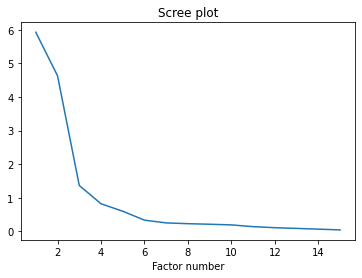

In [179]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
#plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

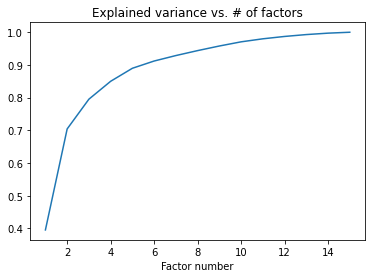

In [180]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
#plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [181]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [182]:
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

    Val.Propre    Seuils
0     5.929761  3.318229
1     4.633467  2.318229
2     1.365325  1.818229
3     0.820760  1.484896
4     0.597654  1.234896
5     0.332343  1.034896
6     0.250892  0.868229
7     0.227171  0.725372
8     0.211052  0.600372
9     0.191358  0.489261
10    0.138938  0.389261
11    0.108120  0.298352
12    0.086344  0.215018
13    0.064977  0.138095
14    0.041837  0.066667


In [183]:
#cf correspond aux coordonnées entre chaque joueur et leur variables p
cf = pd.DataFrame(coord,index=data_pA.index,columns=np.arange(1,p+1))
print(cf)

              1         2         3         4         5         6         7   \
0       0.859567  2.311513 -0.087685 -0.106992 -0.272508  0.043139  0.018548   
1       0.859567  2.311513 -0.087685 -0.106992 -0.272508  0.043139  0.018548   
2       1.292648  1.451088 -0.318503  0.141700 -0.868509  0.425599 -0.506974   
3       1.479131  1.240056 -0.348817  0.109492 -0.963187  0.395776 -0.528512   
4       1.479131  1.240056 -0.348817  0.109492 -0.963187  0.395776 -0.528512   
...          ...       ...       ...       ...       ...       ...       ...   
183973 -3.297154 -1.369943  1.916541  0.567259  1.569288  0.061526  0.327062   
183974 -2.492734 -1.313133  1.423979  0.707132  1.106974 -0.285536 -0.196123   
183975 -2.444942 -1.146392  1.351516  0.670901  0.943429 -0.610056 -0.203801   
183976 -2.111817 -1.242513  1.358310  1.241899  1.603574 -0.689392 -0.439726   
183977 -2.350720 -1.051315  1.443601  1.170242  1.765057 -0.540891 -0.385998   

              8         9         10   

In [184]:
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':data_pA.index,'d_i':di}))

            ID        d_i
0            0   6.680741
1            1   6.680741
2            2   6.374178
3            3   6.336949
4            4   6.336949
...        ...        ...
183973  183973  22.322372
183974  183974  13.237954
183975  183975  12.365925
183976  183976  14.293236
183977  183977  15.352596

[183978 rows x 2 columns]


In [185]:
#Valeurs pour cos
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
    
print(pd.DataFrame({'id':data_pA.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

            id    COS2_1    COS2_2
0            0  0.110595  0.799776
1            1  0.110595  0.799776
2            2  0.262142  0.330342
3            3  0.345249  0.242662
4            4  0.345249  0.242662
...        ...       ...       ...
183973  183973  0.487010  0.084075
183974  183974  0.469387  0.130256
183975  183975  0.483404  0.106277
183976  183976  0.312020  0.108012
183977  183977  0.359932  0.071992

[183978 rows x 3 columns]


In [186]:
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
    
print(pd.DataFrame({'id':data_pA.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

            id         CTR_1     CTR_2
0            0  6.772616e-07  0.000006
1            1  6.772616e-07  0.000006
2            2  1.531643e-06  0.000002
3            3  2.005442e-06  0.000002
4            4  2.005442e-06  0.000002
...        ...           ...       ...
183973  183973  9.964958e-06  0.000002
183974  183974  5.695722e-06  0.000002
183975  183975  5.479412e-06  0.000002
183976  183976  4.087987e-06  0.000002
183977  183977  5.065224e-06  0.000001

[183978 rows x 3 columns]


In [187]:
print(np.sum(ctr,axis=0))
print(acp.components_)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[-2.06694498e-01 -3.09485427e-01 -3.56371569e-01 -3.73986218e-01
  -3.16056346e-01 -3.10958096e-01 -2.99996309e-01 -1.18646563e-02
  -3.44207343e-01 -1.68805482e-01 -1.25024699e-01 -3.43227509e-01
  -8.16984691e-02 -1.07235787e-01 -9.65413132e-02]
 [ 6.80855889e-02 -2.01635801e-01  9.58739819e-02 -9.29434047e-02
  -1.22102469e-01 -9.49975771e-02 -1.64699193e-01  2.46054158e-01
  -7.52335971e-02  3.30041919e-01  3.93220134e-01 -1.07832542e-01
   4.29423904e-01  4.27715927e-01  4.20822453e-01]
 [ 4.16475389e-01  2.59476718e-01  6.13752815e-02 -4.99392641e-03
  -3.28801360e-01 -2.90880848e-01 -3.00722217e-01  5.37795860e-01
   2.04327303e-01  1.47472705e-01 -7.94985091e-02  1.59520081e-01
  -1.69340105e-01 -1.44990566e-01 -1.95154111e-01]
 [-4.35184613e-01  2.06819376e-01  2.40113552e-01  1.69191549e-01
  -3.83248629e-01 -4.51851651e-01 -1.22028861e-01 -3.87338725e-01
   3.08345883e-01 -1.17021057e-01  7.11960095e-02  1.78718566e-01
   6.382

In [188]:
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))

In [189]:
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
print(corvar)

[[-5.03323864e-01  1.46557569e-01  4.86639429e-01 -3.94259039e-01
   5.68087035e-01  6.31043758e-03  6.11720337e-02 -3.69200396e-02
  -1.13568796e-02 -6.36236153e-02 -2.41007351e-02 -1.69730077e-02
   3.29879438e-03 -1.80603130e-03  1.41299547e-04]
 [-7.53631096e-01 -4.34030950e-01  3.03191029e-01  1.87369696e-01
  -1.21818352e-01  3.57625910e-02  4.72610782e-02  5.02455232e-03
   9.94461677e-02 -5.23814844e-02 -2.59918551e-01  1.33293458e-01
  -1.19594714e-02 -1.16600881e-02  3.22900243e-03]
 [-8.67804016e-01  2.06373447e-01  7.17152386e-02  2.17532825e-01
   1.04091226e-01  6.60245956e-02 -1.14673763e-01 -1.39256470e-01
  -1.81829412e-01  2.03670712e-01  8.56697459e-02  1.48755228e-01
  -2.36964003e-03 -5.16623325e-03 -9.08271867e-03]
 [-9.10697625e-01 -2.00065236e-01 -5.83525835e-03  1.53280460e-01
  -2.00588868e-02  5.86418386e-02 -6.87214428e-02 -8.19336592e-02
  -5.62913652e-02  1.08288092e-01 -1.11508486e-01 -2.53354857e-01
   9.70277869e-03  1.34812157e-02 -2.01523619e-03]
 [-7

In [190]:
print(pd.DataFrame({'id':data_pA.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                 id     COR_1     COR_2
0    overall_rating -0.503324  0.146558
1         finishing -0.753631 -0.434031
2     short_passing -0.867804  0.206373
3         dribbling -0.910698 -0.200065
4      acceleration -0.769632 -0.262832
5      sprint_speed -0.757217 -0.204487
6           agility -0.730524 -0.354523
7          strength -0.028892  0.529644
8        long_shots -0.838183 -0.161944
9        aggression -0.411060  0.710431
10    interceptions -0.304449  0.846426
11      positioning -0.835797 -0.232115
12          marking -0.198945  0.924356
13  standing_tackle -0.261131  0.920680
14   sliding_tackle -0.235089  0.905841


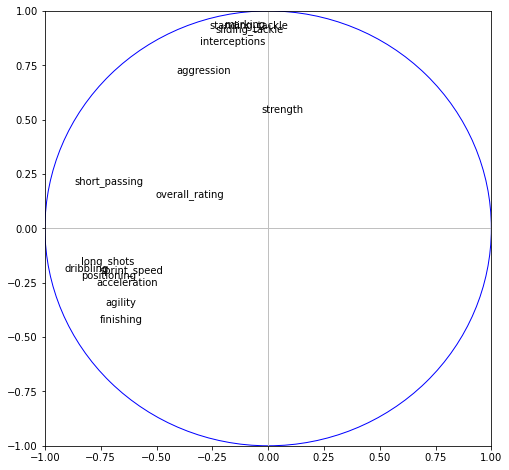

In [191]:
#Affichage des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(data_pA.columns[j],(corvar[j,0],corvar[j,1]))
    
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

In [192]:
#ACP:

#Axe horizontale : bons balle au pied (contrôle de basse , accélération, tir)
#Axe verticale : bons dans les duels (défense)

coord_coor_id = pd.DataFrame({'id':data_pA.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})

In [193]:
temp = coord_coor_id.sort_values(by="COS2_2", ascending=False)
temp.head(5)

,id,COS2_1,COS2_2
91665,91665,0.002878,0.965117
91660,91660,0.004574,0.959869
91659,91659,0.004574,0.959869
91661,91661,0.004574,0.959869
91662,91662,0.004574,0.959869


In [194]:
data_playerA[data_playerA["id"]==91665]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
91664,91665,204637,278857,2013-02-15 00:00:00,64.0,72.0,left,medium,medium,56.0,...,62.0,67.0,16.0,18.0,17.0,12.0,11.0,9.0,12.0,12.0


In [195]:
data_player[data_player["player_api_id"]==278857]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
5506,5513,278857,Julian-Maurice Derstroff,204637,1992-01-05,182.88,74,23


In [196]:
temp = coord_coor_id.sort_values(by="COS2_1", ascending=False)
temp.head(5)

,id,COS2_1,COS2_2
163641,163641,0.957307,0.001658
151079,151079,0.956098,0.007268
3332,3332,0.951994,0.017731
3333,3333,0.951355,0.017602
3330,3330,0.950661,0.017215


In [197]:
data_playerA[data_playerA["id"]==163641]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
163640,163641,103936,39232,2013-09-27 00:00:00,78.0,78.0,right,high,high,78.0,...,73.0,80.0,45.0,55.0,55.0,6.0,8.0,15.0,6.0,9.0


In [198]:
data_player[data_player["player_api_id"]==39232]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
9812,9828,39232,Simone Pepe,103936,1983-08-30,175.26,78,32


On regarde l'acp avec un très bon joueur

In [199]:
data_player[data_player["player_name"] == "Zlatan Ibrahimovic"] 

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
11041,11057,35724,Zlatan Ibrahimovic,41236,1981-10-03,195.58,94,34


In [200]:
#Ex: Zlatan
#Index = 11041
coord_coor_id[coord_coor_id["id"] == 1101] 

,id,COS2_1,COS2_2
1101,1101,0.662551,0.235168


On peut observer que Zlatan est plus attaquant mais qu'il est bon aussi en défense grâce à son physique et son niveau de jeu
